In [1]:
import argparse
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import re

In [2]:
""" 
Options for key_1:

histogram_transverse_momentum_j1
histogram_transverse_momentum_j2
histogram_transverse_momentum_h1
histogram_transverse_momentum_jjh
histogram_invariant_mass_mjj12
histogram_rapidity_j1j2
histogram_rapidity_j1
histogram_rapidity_j2
histogram_rapidity_h1



Options for key_2:

ptj1
ptj2
mjj
yjj
ptH
ptHjj
yj1
yj2
yH
"""

key_to_plot_1 = "histogram_invariant_mass_mjj12"
key_to_plot_2 = "mjj"

### Top reader and HISTO plotter

In [3]:
from readers.topreader import TopReader

In [4]:
from plotters.histoplotter import HistoPlotter

In [5]:
base_file_path = "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/"
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
reader = TopReader(mapping = {
                "proVBFH_LO"    : base_file_path_2 + "proVBFH/results/lo-central.top",
                "proVBFH_NLO"   : base_file_path_2 + "proVBFH/results/nlo-central.top", 
                "POWHEG_NLO"    : base_file_path_2 + "powheg/runs/NLO-powheg.top",
                "POWHEG_LO"     : base_file_path_2 + "powheg/runs/LO-powheg.top",
                "HAWKFULL_LO"       : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t.txt",
                "HAWKFULL_NLO"      : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t.txt",
                "HAWKVBF_LO"       : base_file_path_2 + "Hawk/results/HAWK_lo.top",
                "HAWKVBF_NLO"      : base_file_path_2 + "Hawk/results/HAWK_nlo.top",
                "MoCaNLO_LO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "MoCaNLO_NLO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "HAWKVBF_NLO_NF4"   : base_file_path_2 + "Hawk/results/HAWK_nlo_nf4.top",
                "proVBFH_NLO_NF4" : base_file_path_2 + "proVBFH/results/nlo-nf4.top", 
                "MoCaNLO_LO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "MoCaNLO_NLO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "HAWKFULL_LO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t_nf4.txt",
                "HAWKFULL_NLO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t_nf4.txt",
                "central_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-central.top",
                "max_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-max.top",
                "min_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-min.top",
                "central_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-central.top",
                "max_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-max.top",
                "min_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-min.top",
                "central_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-central.top",
                "max_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-max.top",
                "min_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-min.top",
        })

Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/lo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/nlo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/NLO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/LO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_LO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_NLO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_lo.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_nlo.top
Couldn't tokenize file MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/
Couldn't tokenize file MoCaNLO/results/

In [6]:
# New reader from 2dplot
reader = TopReader(mapping = {
                "proVBFH_LO"    : base_file_path_2 + "proVBFH/results/lo-central.top",
                "proVBFH_NLO"   : base_file_path_2 + "proVBFH/results/nlo-central.top", 
                "POWHEG_NLO"    : base_file_path_2 + "powheg/runs/NLO-powheg.top",
                "POWHEG_LO"     : base_file_path_2 + "powheg/runs/LO-powheg.top",
                "HAWKFULL_LO"       : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t.txt",
                "HAWKFULL_NLO"      : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t.txt",
                "HAWKVBF_LO"       : base_file_path_2 + "Hawk/results/HAWK_lo.top",
                "HAWKVBF_NLO"      : base_file_path_2 + "Hawk/results/HAWK_nlo.top",
                "MoCaNLO_LO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "MoCaNLO_NLO"    : "MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "HAWKVBF_NLO_NF4"   : base_file_path_2 + "Hawk/results/HAWK_nlo_nf4.top",
                "proVBFH_NLO_NF4" : base_file_path_2 + "proVBFH/results/nlo-nf4.top", 
                "MoCaNLO_LO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "MoCaNLO_NLO_NF4"    : base_file_path_2 + "MoCaNLO/results/STXS/nlo_qcd_4f/",
                "HAWKFULL_LO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_LO_s+t_nf4.txt",
                "HAWKFULL_NLO_NF4"    : base_file_path_2 + "Hawk/results/differential_distributions_setup2a_NLO_s+t_nf4.txt",
                "central_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-central.top",
                "max_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-max.top",
                "min_scale_proVBFH_NNLO" : base_file_path_2 + "proVBFH/results/nnlo-min.top",
                "central_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-central.top", 
                "proVBFH_NNLO_nonfact" : base_file_path_2 + "proVBFH/results/nnlo-nonfact-central.top",
                "max_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-max.top",
                "min_scale_proVBFH_LO" : base_file_path_2 + "proVBFH/results/lo-min.top",
                "central_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-central.top",
                "max_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-max.top",
                "min_scale_proVBFH_NLO" : base_file_path_2 + "proVBFH/results/nlo-min.top",
        })

Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/lo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/proVBFH/results/nlo-central.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/NLO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/LO-powheg.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_LO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/differential_distributions_setup2a_NLO_s+t.txt
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_lo.top
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/Hawk/results/HAWK_nlo.top
Couldn't tokenize file MoCaNLO/results/setup.2.a/nlo_qcd/:MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/
Couldn't tokenize file MoCaNLO/results/

In [7]:
"""
Readers read files and save them in this format 
as an attribute of a class

Histo plotter uses this kind of input (and another one for complex multiplots)
"""
reader.bigstxs_postprocessed_proVBFH_LO

[{'index': 'ptj1-STXS',
  'data': [(0.0, 20.0, 0.0, 0.0, 0.0),
   (20.0, 40.0, 0.001630384, 4.965659999999991e-05, 4.721280000000009e-05),
   (40.0, 60.0, 0.012187338, 0.0003919560000000006, 0.00038411300000000016),
   (60.0, 80.0, 0.017695665, 0.0006202559999999996, 0.0006223440000000004),
   (80.0, 100.0, 0.016582584, 0.0006277379999999992, 0.0006438580000000006),
   (100.0, 120.0, 0.013055299, 0.0005320859999999993, 0.0005531640000000001),
   (120.0, 140.0, 0.0095215327, 0.0004129897999999993, 0.00043943029999999987),
   (140.0, 160.0, 0.0067321912, 0.00031114270000000017, 0.0003324052000000001),
   (160.0, 180.0, 0.0047049285, 0.00022998150000000037, 0.0002507378999999999),
   (180.0, 200.0, 0.0032894695, 0.0001695211999999998, 0.0001857568999999999),
   (200.0,
    220.0,
    0.0023120589,
    0.00012536169999999985,
    0.00013823900000000007),
   (220.0, 240.0, 0.0016369896, 9.338949999999988e-05, 0.0001041595000000001),
   (240.0, 260.0, 0.0011699357, 6.96373000000001e-05, 7.84

In [8]:
# dir(reader) # To find all data attributes of the reader

In [9]:
# Histo plotter takes reader as a parameter 
plotter = HistoPlotter(reader)

In [10]:
#plotter.save_histo_plots(lo_list, "histo_proVBFH_LO", "nnlo")

### MoCaNLO reader and universal plotter

In [11]:
result_files = {
                "proVBFH_LO"    : "proVBFH/results/lo.top",
                "proVBFH_NLO"   : "proVBFH/results/nlo.top", 
                "POWHEG_NLO"    : "powheg/runs/NLO-powheg.top",
                "POWHEG_LO"     : "powheg/runs/LO-powheg.top",
                "HAWKFULL_LO"       : "Hawk/results/differential_distributions_setup2a_LO_s+t.txt",
                "HAWKFULL_NLO"      : "Hawk/results/differential_distributions_setup2a_NLO_s+t.txt",
                "HAWKVBF_LO"       : "Hawk/results/HAWK_lo.top",
                "HAWKVBF_NLO"      : "Hawk/results/HAWK_nlo.top",
                "MoCaNLO_LO"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.a/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.b/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd/",
                "MoCaNLO_NLO"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.a/nlo_qcd/:/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/setup.2.b/nlo_qcd/:MoCaNLO/results/STXS/nlo_qcd/",
                "HAWKVBF_NLO_NF4"   : "Hawk/results/HAWK_nlo_nf4.top",
                "proVBFH_NLO_NF4" : "proVBFH/results/nlo-nf4.top", 
                "MoCaNLO_LO_NF4"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd_4f/",
                "MoCaNLO_NLO_NF4"    : "/Users/nikitadolganov/Work/particle/vbf-higgs-wg/MoCaNLO/results/STXS/nlo_qcd_4f/",
                "HAWKFULL_LO_NF4"    : "Hawk/results/differential_distributions_setup2a_LO_s+t_nf4.txt",
                "HAWKFULL_NLO_NF4"    : "Hawk/results/differential_distributions_setup2a_NLO_s+t_nf4.txt",
}

In [12]:
from readers.mocanloreader import MocanloReader

In [13]:
red = MocanloReader()

In [14]:
mocanlo_nlo_qcd_born, mocanlo_nlo_qcd_nlo, mocanlo_nlo_ew_w_photon_born, mocanlo_nlo_ew_w_photon_nlo, mocanlo_loop_induced, mocanlo_loop_induced_2, mocanlo_nlo_ew_no_photon_nlo, mocanlo_nlo_ew_photon_only, mocanlo_ggF_born = red.get_mocanlo_data_from_file_path(base_file_path_2, key_to_plot_1, "STXS")

In [15]:
# The format of MocanloReader is the same as TopReader
# However data needs to be postprocessed for the use of HistoPlotter.get_bigstxs_complex_histogram
mocanlo_nlo_ew_w_photon_born

{'index': 'histogram_invariant_mass_mjj12_born.dat',
 'data': [(0.0,
   50.0,
   6.230038041011061e-05,
   3.9215092148760856e-06,
   3.135140976425109e-06),
  (50.0,
   100.0,
   0.011358222745905349,
   0.0006022504874778089,
   0.00047292038374996),
  (100.0,
   150.0,
   0.001663974271888365,
   0.00010395024697265699,
   8.146597489516605e-05),
  (150.0,
   200.0,
   0.002179266175761418,
   0.00011486366314549601,
   8.60697471446219e-05),
  (200.0,
   250.0,
   0.002560877134794212,
   0.00010802062979107685,
   7.622775902140511e-05),
  (250.0,
   300.0,
   0.002708145619938773,
   8.872788525811081e-05,
   5.748315081605204e-05),
  (300.0,
   350.0,
   0.002706152053860815,
   6.573285099565985e-05,
   3.6984355827988314e-05),
  (350.0,
   400.0,
   0.0026190373541636557,
   4.345507269240079e-05,
   1.806778013148014e-05),
  (400.0,
   450.0,
   0.002485944616365274,
   2.3673315440186028e-05,
   1.9030252202991704e-06),
  (450.0, 500.0, 0.0023318515642309816, 1.1299289294908

From here everything is just a data postprocessing for plotting

In [16]:
for i in reader.bigstxs_postprocessed_proVBFH_NLO:
    print(i["index"])

ptj1-STXS
ptj2-STXS
mjj-STXS
yjj-STXS
ptH-STXS
ptHjj-STXS
yj1-STXS
yj2-STXS
yH-STXS


In [17]:
# Getting ptH data from top reader
bigstxs_list = list(filter(lambda x: "bigstxs" in x or ("stxs" in x and "nonfact" in x),dir(reader)))
top_data_dict = {}
for bigstxt in bigstxs_list:
    try:
        top_data_dict[bigstxt] = list(filter(lambda x: x["x_param"] == key_to_plot_2,getattr(reader, bigstxt)))[0]["data"]
    except:
        pass

In [18]:
# Using a dictionary comprehension to filter out items with empty lists
filtered_top_data = {key: value for key, value in top_data_dict.items() if value}

In [18]:
"""
This data is passed to HistoPlotter.get_bigstxs_complex_histogram
"""

data = {}
data["x_param"] = mocanlo_nlo_ew_w_photon_born["x_param"]
data["data"] = filtered_top_data
data["other_params"] = []
data["data"]["MoCaNLO_LO"] = mocanlo_nlo_ew_w_photon_born["data"]

data["data"]["MoCaNLO_loop_induced"] = mocanlo_loop_induced["data"]
data["data"]["MoCaNLO_loop_induced_2"] = mocanlo_loop_induced_2["data"]

photon_only = red.sum_mocanlo_data(mocanlo_nlo_ew_w_photon_born["data"], mocanlo_nlo_ew_photon_only["data"])
with_photon = red.sum_mocanlo_data(mocanlo_nlo_ew_w_photon_born["data"], mocanlo_nlo_ew_w_photon_nlo["data"])
data["data"]["MoCaNLO_NLO_EW"] = with_photon
data["data"]["MoCaNLO_NLO_EW_photon_only"] = photon_only

data["data"]["STXS_proVBFH_NNLO_EW"] = red.product_top_mocanlo(data["data"]["bigstxs_postprocessed_proVBFH_NNLO"],
                                                           red.one_delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], mocanlo_nlo_ew_w_photon_nlo["data"]))

mocanlo_correction_and_born = red.sum_mocanlo_data(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"])
data["data"]["MoCaNLO_NLO_QCD_ratio"] = red.delta_mocanlo(mocanlo_correction_and_born, data["data"]["bigstxs_postprocessed_proVBFH_NLO"])
data["data"]["MoCaNLO_LO_QCD_ratio"] = red.delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], data["data"]["bigstxs_postprocessed_proVBFH_LO"])

In [19]:
###from Jiayi based on Mathieu's comment Oct23

#sigma_qcd_nlo
mocanlo_qcd_nlo_prediction = red.sum_mocanlo_data(mocanlo_nlo_qcd_born["data"], mocanlo_nlo_qcd_nlo["data"])

#(1+deltaNNLO QCD)
delta_vbf = red.delta_mocanlo(red.minus_mocanlo_data(data["data"]["bigstxs_postprocessed_proVBFH_NNLO"],
                              data["data"]["bigstxs_postprocessed_proVBFH_NLO"]),data["data"]["bigstxs_postprocessed_proVBFH_LO"]
                             )
one = [(i[0], i[1], 1, 0, 0) for i in delta_vbf]
one_plus_delta_vbf = red.sum_mocanlo_data(one, delta_vbf)
#(1+deltaNLO EW)
delta_ew = red.one_delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"],mocanlo_nlo_ew_no_photon_nlo["data"])

#Delta photon (quick and dirty rescaling)

delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]

best_2 = red.sum_mocanlo_data(red.product_top_mocanlo(mocanlo_qcd_nlo_prediction,
                                                      red.product_top_mocanlo(one_plus_delta_vbf, delta_ew)),
                              delta_ew_photon_only_1)
data["data"]["best_prediction_final"] = best_2

####################################################################################################################

full_nlo_ew_w_photon = red.one_delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], mocanlo_nlo_ew_w_photon_nlo["data"])
full_nlo_ew_photon_only = red.one_delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], mocanlo_nlo_ew_photon_only["data"])

data["data"]["full_nlo_ew_w_photon"] = full_nlo_ew_w_photon
data["data"]["full_nlo_ew_photon_only"] = full_nlo_ew_photon_only

In [20]:
data["data"]["bigstxs_postprocessed_proVBFH_LO_ratio"] = data["data"]["bigstxs_postprocessed_proVBFH_LO"]

Version from 2Dplot (NF and ggF)

In [19]:
data = {}
data["x_param"] = mocanlo_nlo_ew_w_photon_born["x_param"]
data["data"] = filtered_top_data
data["other_params"] = []

In [20]:
data["data"].keys()

dict_keys(['bigstxs_POWHEG_LO', 'bigstxs_POWHEG_NLO', 'bigstxs_central_scale_proVBFH_LO', 'bigstxs_central_scale_proVBFH_NLO', 'bigstxs_central_scale_proVBFH_NNLO', 'bigstxs_max_scale_proVBFH_LO', 'bigstxs_max_scale_proVBFH_NLO', 'bigstxs_max_scale_proVBFH_NNLO', 'bigstxs_min_scale_proVBFH_LO', 'bigstxs_min_scale_proVBFH_NLO', 'bigstxs_min_scale_proVBFH_NNLO', 'bigstxs_postprocessed_proVBFH_LO', 'bigstxs_postprocessed_proVBFH_NLO', 'bigstxs_postprocessed_proVBFH_NNLO', 'bigstxs_postprocessed_sum_proVBFH_LO', 'bigstxs_postprocessed_sum_proVBFH_NLO', 'bigstxs_postprocessed_sum_proVBFH_NNLO', 'bigstxs_proVBFH_LO', 'bigstxs_proVBFH_NLO', 'bigstxs_proVBFH_NLO_NF4', 'bigstxs_proVBFH_NNLO_nonfact'])

In [21]:
proVBF_setup = "bigstxs"

In [22]:
#sigma_qcd_nlo
mocanlo_qcd_nlo_prediction = red.sum_mocanlo_data(mocanlo_nlo_qcd_born["data"], mocanlo_nlo_qcd_nlo["data"])

#(1+deltaNNLO QCD)
delta_vbf = red.delta_mocanlo(red.sum_mocanlo_data( data["data"]["%s_proVBFH_NNLO_nonfact"%proVBF_setup],
                                  red.minus_mocanlo_data(data["data"]["%s_central_scale_proVBFH_NNLO"%proVBF_setup],data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])),
                              data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup]
                             )
one = [(i[0], i[1], 1, 0, 0) for i in delta_vbf]
one_plus_delta_vbf = red.sum_mocanlo_data(one, delta_vbf)

#(1+deltaNLO EW)
delta_ew = red.sum_mocanlo_data(one, mocanlo_nlo_ew_no_photon_nlo["data"])

##Delta photon (quick and dirty rescaling)
#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_photon_only['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_photon_only['data']
#]

best_2 = red.sum_mocanlo_data(red.product_top_mocanlo(mocanlo_qcd_nlo_prediction,
                                                      red.product_top_mocanlo(one_plus_delta_vbf, delta_ew)),
                              mocanlo_nlo_ew_photon_only)

####################################################################################################################

full_nlo_ew_w_photon = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_w_photon_nlo["data"], mocanlo_nlo_ew_w_photon_born["data"]))
full_nlo_ew_photon_only = red.sum_mocanlo_data(one, red.delta_mocanlo(mocanlo_nlo_ew_photon_only["data"],mocanlo_nlo_ew_w_photon_born["data"]))

mocanlo_correction_and_born = red.sum_mocanlo_data(mocanlo_nlo_qcd_nlo["data"], mocanlo_nlo_qcd_born["data"])
data["data"]["MoCaNLO_LO"] = mocanlo_nlo_ew_w_photon_born["data"]

#delta_ew_photon_only_1 = mocanlo_nlo_ew_photon_only["data"]
#mocanlo_nlo_ew_w_photon_born['data'] = [
#    (entry[0], entry[1], entry[2] / 200., entry[3]/200., entry[4]/200.)
#    for entry in mocanlo_nlo_ew_w_photon_born['data']
#]
data["data"]["MoCaNLO_NLO_QCD_ratio"] = red.delta_mocanlo(mocanlo_correction_and_born, data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["MoCaNLO_LO_QCD_ratio"] = red.delta_mocanlo(mocanlo_nlo_ew_w_photon_born["data"], data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup])

data["data"]["MoCaNLO_loop_induced"] = mocanlo_loop_induced["data"]
data["data"]["MoCaNLO_loop_induced_2"] = mocanlo_loop_induced_2["data"]
data["data"]["MoCaNLO_ggF_LO"] = mocanlo_ggF_born["data"]



data["data"]["best_prediction_final"] = best_2
data["data"]["full_nlo_ew_w_photon"] = full_nlo_ew_w_photon
data["data"]["full_nlo_ew_photon_only"] = full_nlo_ew_photon_only

data["data"]["%s_central_scale_proVBFH_LO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_LO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup] = red.delta_mocanlo(data["data"]["%s_central_scale_proVBFH_NNLO"%proVBF_setup],
                                                                           data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
data["data"]["%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup] = red.sum_mocanlo_data(one,
                                                                                  red.delta_mocanlo(data["data"]["%s_proVBFH_NNLO_nonfact"%proVBF_setup],
                                                                                       data["data"]["%s_central_scale_proVBFH_NLO"%proVBF_setup])
                                                                                 )

In [23]:
# This is how data for plotting looks like 
data

{'x_param': '$M_{\\text{j}_1\\text{j}_2}\\,$[GeV]',
 'data': {'bigstxs_POWHEG_LO': [(0.0, 50.0, 0.0, 0.0, 0.0),
   (50.0, 100.0, 0.0, 0.0, 0.0),
   (100.0, 150.0, 0.0, 0.0, 0.0),
   (150.0, 200.0, 0.0, 0.0, 0.0),
   (200.0, 250.0, 0.0, 0.0, 0.0),
   (250.0, 300.0, 0.0, 0.0, 0.0),
   (300.0, 350.0, 0.0, 0.0, 0.0),
   (350.0, 400.0, 0.0026220391, 6.4762335e-07, 6.4762335e-07),
   (400.0, 450.0, 0.0024862233, 6.120685e-07, 6.120685e-07),
   (450.0, 500.0, 0.002333416, 5.8149255e-07, 5.8149255e-07),
   (500.0, 550.0, 0.0021708504, 5.540604e-07, 5.540604e-07),
   (550.0, 600.0, 0.0020134413, 5.3144585e-07, 5.3144585e-07),
   (600.0, 650.0, 0.0018596918, 5.111079e-07, 5.111079e-07),
   (650.0, 700.0, 0.0017166465, 4.9362544e-07, 4.9362544e-07),
   (700.0, 750.0, 0.0015847677, 4.7816963e-07, 4.7816963e-07),
   (750.0, 800.0, 0.0014618001, 4.64024055e-07, 4.64024055e-07),
   (800.0, 850.0, 0.0013452469, 4.51246195e-07, 4.51246195e-07),
   (850.0, 900.0, 0.0012435135, 4.40776595e-07, 4.40776595

In [24]:
# reference_list is just a settings json for plotting
# label_mapping is a dict to rename data["data"].keys() in the plot
reference_list = [ {"data_ind": ["bigstxs_postprocessed_proVBFH_LO", "best_prediction_final"],#"best_prediction_1", "best_prediction_2", "best_prediction_3"],
                    "error_bands": True,
                    
                    },
                    {"data_ind": ["bigstxs_postprocessed_proVBFH_NLO", "bigstxs_postprocessed_proVBFH_LO_ratio", "bigstxs_postprocessed_proVBFH_NNLO"],
                    "reference_ind": "bigstxs_postprocessed_proVBFH_NLO",
                    "error_bands": True,
                    "horizontal_line": True,
                    "plot_label_for_reference": True,
                    "label": "ratio to\nVBF NLO QCD",
                    "y_scale": (0.94,1.21),
                    },
                    {"data_ind": ["full_nlo_ew_photon_only", "full_nlo_ew_w_photon"],
                    "error_bands": False,
                    "horizontal_line": True,
                    "label": "Full\n NLO EW/LO",
                    "y_scale": (0.9,1.01),
                    },
                    {"data_ind": ["MoCaNLO_NLO_QCD_ratio", "MoCaNLO_LO_QCD_ratio"],
                    "error_bands": True,
                    "label": "Full/VBF",
                    "horizontal_line": True,
                    "y_scale": (0.9,1.2),
                    },
                    {"data_ind": ["MoCaNLO_loop_induced", "MoCaNLO_loop_induced_2"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "Loop Induced/LO",
                    "y_scale": (-0.01,0.1),
                    "error_bands": True,
                    },
                    
                ]

label_mapping = {
    "full_nlo_ew_photon_only": "Photon only",
    "full_nlo_ew_w_photon": "NLO with photon",
    "best_prediction_final": "Best prediction",
    "MoCaNLO_NLO_EW_photon_only": "Photon only",
    "best_prediction_1": "without photon",
    "best_prediction_2" : "photon only correction",
    "best_prediction_3" : "EW NLO with photon - EW NLO without photon",
    "bigstxs_postprocessed_proVBFH_LO": "LO",
    "bigstxs_postprocessed_proVBFH_NLO": "NLO QCD",
    "STXS_proVBFH_NNLO_EW": "Best prediction", 
    "bigstxs_postprocessed_proVBFH_LO_ratio": "LO",
    "bigstxs_postprocessed_proVBFH_NNLO": "NNLO QCD", 
    "MoCaNLO_NLO_EW": "",
    "MoCaNLO_NLO_QCD_ratio": "NLO", 
    "MoCaNLO_LO_QCD_ratio": "LO",
    "MoCaNLO_loop_induced": "Loop induced",
    "MoCaNLO_loop_induced_2": "Loop induced squared"
}

In [25]:
# this is from 2d plot


label_mapping = {
    "full_nlo_ew_photon_only": "Photon only",
    "full_nlo_ew_w_photon": "NLO with photon",
    "best_prediction_final": "Best prediction",
    "MoCaNLO_NLO_EW_photon_only": "Photon only",
    "best_prediction_1": "without photon",
    "best_prediction_2" : "photon only correction",
    "best_prediction_3" : "EW NLO with photon - EW NLO without photon",
    "bigstxs_postprocessed_proVBFH_LO": "LO",
    "bigstxs_postprocessed_proVBFH_NLO": "NLO QCD",
    "STXS_proVBFH_NNLO_EW": "Best prediction", 
    "bigstxs_postprocessed_proVBFH_LO_ratio": "LO",
    "bigstxs_postprocessed_proVBFH_NLO_ratio": "NLO",
    "bigstxs_postprocessed_proVBFH_NNLO_ratio": "NNLO",
    "bigstxs_postprocessed_proVBFH_NNLO": "NNLO QCD", 
    "%s_central_scale_proVBFH_LO"%proVBF_setup: "LO",
    "%s_central_scale_proVBFH_NLO"%proVBF_setup: "NLO",
    "%s_central_scale_proVBFH_NNLO"%proVBF_setup: "NNLO",
    "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup: "NF",
    "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup: "LO",
    "%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup: "NLO",
    "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup: "NNLO",
    "full_nlo_qcd_correction": "NLO",
    "mocanlo_qcd_nlo_prediction": "NLO",
    "mocanlo_nlo_qcd_born": "LO",
    "MoCaNLO_NLO_EW": "",
    "MoCaNLO_NLO_QCD_ratio": "NLO", 
    "MoCaNLO_LO_QCD_ratio": "LO",
    "MoCaNLO_loop_induced": "Loop-induced interference",
    "MoCaNLO_loop_induced_2": "Loop-induced squared",
    "MoCaNLO_ggF_LO": "LO ggF"
}
color_mapping = {
    "full_nlo_ew_photon_only": "#E1C16E", #Brass
    "full_nlo_ew_w_photon": "#6F4E37", #coffee
    "best_prediction_final": "#50C878", #Emerald Green
    "MoCaNLO_NLO_EW_photon_only": "",
    "best_prediction_1": "",
    "best_prediction_2" : "",
    "best_prediction_3" : "",
    "%s_central_scale_proVBFH_LO"%proVBF_setup: "#0096FF", #bright blue
    "%s_central_scale_proVBFH_NLO"%proVBF_setup: "#5F9EA0", #Cadet Blue
    "STXS_proVBFH_NNLO_EW": "",
    "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup: "#0096FF",
    "%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup: "#5F9EA0", #Cadet Blue
    "full_nlo_qcd_correction": "#5F9EA0", #Cadet Blue
    "mocanlo_qcd_nlo_prediction": "#5F9EA0",
    "mocanlo_nlo_qcd_born": "#0096FF",
    "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup: "#C30000", #"#5D3FD3",#Iris
    "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup: "#F5CF9F", #light orange
    "MoCaNLO_NLO_EW": "",
    "MoCaNLO_NLO_QCD_ratio": "#988558", #Dark Tan
    "MoCaNLO_LO_QCD_ratio": "#CD7F32", #Bronze
    "MoCaNLO_loop_induced": "#708090",#Slate Gray
    "MoCaNLO_loop_induced_2": "#8A9A5B",#Sage Green
    "MoCaNLO_ggF_LO":"#F5CF9F"
}


In [26]:
# pTH vs Mjj
reference_list = [ {"data_ind": ["%s_central_scale_proVBFH_LO"%proVBF_setup, "best_prediction_final"],#"best_prediction_1", "best_prediction_2", "best_prediction_3"],
                    "error_bands": True,
                    #"y_scale": (10**(-8),5*10**(-3)),
                    },
                  {"data_ind": ["%s_central_scale_proVBFH_NLO_ratio"%proVBF_setup, "%s_central_scale_proVBFH_LO_ratio"%proVBF_setup, 
                                "%s_central_scale_proVBFH_NNLO_ratio"%proVBF_setup, "%s_proVBFH_NNLO_nonfact_ratio"%proVBF_setup],
                    #"reference_ind": "bigstxs_postprocessed_proVBFH_NLO",
                    "error_bands": True,
                    "horizontal_line": False,
                    #"plot_label_for_reference": True,
                    "label": "ratio to\nVBF NLO QCD",
                    #"y_scale": (0.4,1.53),
                    },
                  {"data_ind": ["full_nlo_ew_photon_only", "full_nlo_ew_w_photon"],
                    "error_bands": False,
                    "horizontal_line": True,
                    "label": "Full\n NLO EW/LO",
                    #"y_scale": (0.65,1.02),
                    },

                    {"data_ind": ["MoCaNLO_NLO_QCD_ratio", "MoCaNLO_LO_QCD_ratio"],
                    "error_bands": True,
                    "label": "Full/VBF",
                    "horizontal_line": True,
                    #"y_scale": (0.0000,6.3000),
                    },
                    {"data_ind": ["MoCaNLO_loop_induced", "MoCaNLO_loop_induced_2"],#, "MoCaNLO_ggF_LO"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "Loop-induced/LO",
                    #"y_scale": (-0.005,0.7000),
                    "error_bands": True,
                    },
                    {"data_ind": ["MoCaNLO_ggF_LO"],#, "MoCaNLO_ggF_LO"],
                    "reference_ind": "MoCaNLO_LO",
                    "horizontal_line": False,
                    "label": "ggF/LO",
                    #"y_scale": (-0.0,10.5000),
                    "error_bands": True,
                    }


                 ]

In [27]:
from plotters.histoplotter import HistoPlotter

In [28]:
plotter = HistoPlotter(reader)

In [29]:
settings = {
    "x_param_labelpad": -40,
    "x_param_label": "$M_{jj}$",
    "x_param_position": -0.03,
    "left_title": r"pp $\longrightarrow$ H + 2j",
    "right_title": r"$\sqrt{S} = 13.6\,\mathrm{TeV}$",
}

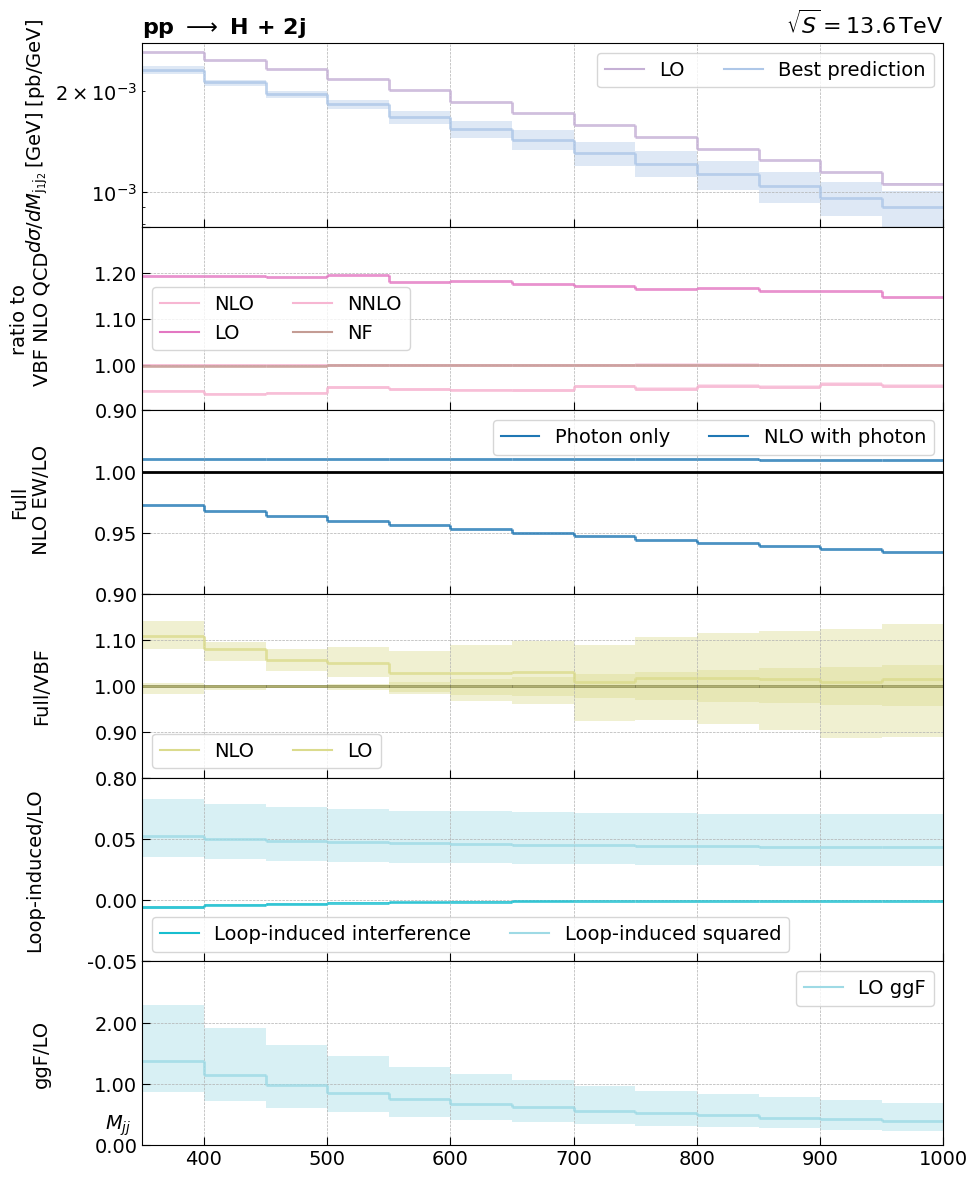

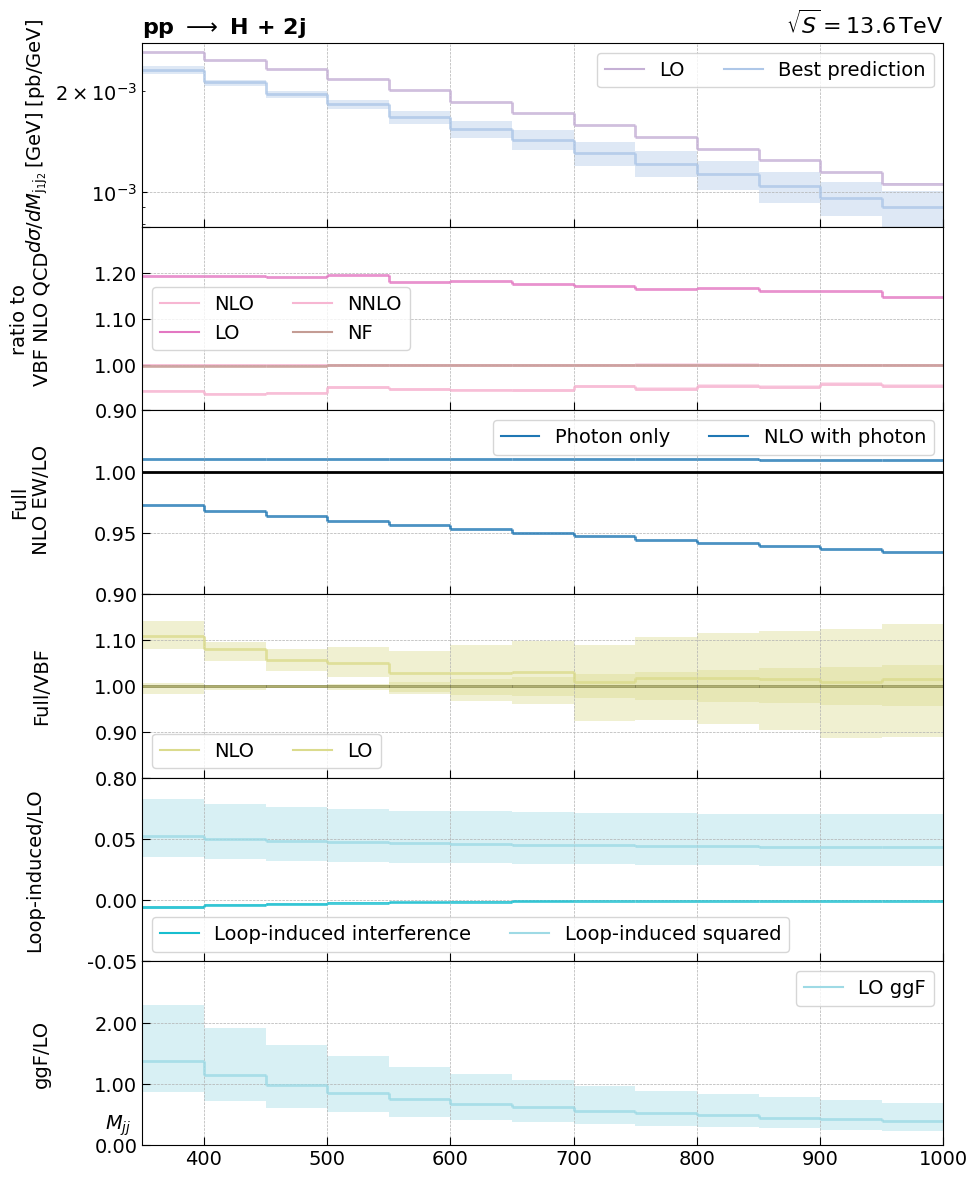

In [30]:
plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list, label_mapping, 350, 1000, 0, settings=settings)

### YodaReader

In [3]:
from readers.yodareader import YodaReader

In [4]:
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
mapping_yoda = {
    "pythia" : base_file_path_2 + "powheg/runs/powheg-pythia.yoda",
    "vincia" : base_file_path_2 + "powheg/runs/powheg-vincia.yoda",
    "powheg": base_file_path_2 + "powheg/runs/powheg-herwig.yoda",
    "bigstxs_central_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mushdefault/histos.yoda",
    "bigstxs_max_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mush2/histos.yoda",
    "bigstxs_min_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mush0.5/histos.yoda",
    "bigstxs_central_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO-down.yoda",
    "bigstxs_central_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO-down.yoda",
    "sherpa_dipole" : base_file_path_2 + "Sherpa/Sherpa-VBF.yoda",
    "sherpa_dire" : base_file_path_2 + "Sherpa/Sherpa-Dire-VBF.yoda",
}

In [5]:
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
mapping_yoda = {
    "pythia" : base_file_path_2 + "pythia/pythia-pThard2.yoda",
    "vincia" : base_file_path_2 + "pythia/vincia-pThard2.yoda",
    "pythia_pt_2" : base_file_path_2 + "pythia/pythia-pThard0.yoda",
    "vincia_pt_2" : base_file_path_2 + "pythia/vincia-pThard0.yoda",
    "powheg": base_file_path_2 + "powheg/runs/powheg-herwig.yoda",
    "bigstxs_central_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mushdefault/histos.yoda",
    "bigstxs_max_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mush2/histos.yoda",
    "bigstxs_min_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_mush0.5/histos.yoda",
    "bigstxs_central_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/VBF-Dipole-MCatNLO-down.yoda",
    "bigstxs_central_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/VBF-AO-MCatNLO-down.yoda",
    "sherpa_dipole" : base_file_path_2 + "Sherpa/Sherpa-VBF.yoda",
    "sherpa_dire" : base_file_path_2 + "Sherpa/Sherpa-Dire-VBF.yoda",
}

In [6]:
yoda_reader = YodaReader(mapping=mapping_yoda, full_ew_flag=False)

Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/pythia-pThard2.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/vincia-pThard2.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/pythia-pThard0.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/vincia-pThard0.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs/powheg-herwig.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_mushdefault/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_mush2/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_mush0.5/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/hw7/yh-runs/VBF-Dipole-MCatNLO.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/hw7/yh-runs/VBF-Dip

In [7]:
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
mapping_yoda_full = {
    "pythia" : base_file_path_2 + "pythia/pythia-nlopsew-new.yoda",
    "vincia" : base_file_path_2 + "pythia/vincia-nlopsew-new.yoda",
    "powheg": base_file_path_2 + "powheg/runs-fullEW/powheg-herwig.yoda",
    "bigstxs_central_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mushdefault/histos.yoda",
    "bigstxs_max_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mush2/histos.yoda",
    "bigstxs_min_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mush0.5/histos.yoda",
    "bigstxs_central_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO-down.yoda",
    "bigstxs_central_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO-down.yoda",
    "sherpa_dipole" : base_file_path_2 + "Sherpa/Sherpa-Full-EW.yoda",
    "sherpa_dire" : base_file_path_2 + "Sherpa/Sherpa-Dire-Full-EW.yoda",
}

In [8]:
base_file_path_2 = "/Users/nikitadolganov/Work/particle/plot_work/just_data/"
mapping_yoda_full = {
    "pythia" : base_file_path_2 + "pythia/pythia-nlopsew-pThard2.yoda",
    "vincia" : base_file_path_2 + "pythia/vincia-nlopsew-pThard2.yoda",
    "pythia_pt_2" : base_file_path_2 + "pythia/pythia-nlopsew-pThard0.yoda",
    "vincia_pt_2" : base_file_path_2 + "pythia/vincia-nlopsew-pThard0.yoda",
    "powheg": base_file_path_2 + "powheg/runs-fullEW/powheg-herwig.yoda",
    "bigstxs_central_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mushdefault/histos.yoda",
    "bigstxs_max_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mush2/histos.yoda",
    "bigstxs_min_scale_madH7" : base_file_path_2 + "MG5_aMCplusH7/run_FULL_mush0.5/histos.yoda",
    "bigstxs_central_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_dipole" : base_file_path_2 + "hw7/yh-runs/HJets-Dipole-MCatNLO-down.yoda",
    "bigstxs_central_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO.yoda",
    "bigstxs_max_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO-up.yoda",
    "bigstxs_min_scale_herwig_ao" : base_file_path_2 + "hw7/yh-runs/HJets-AO-MCatNLO-down.yoda",
    "sherpa_dipole" : base_file_path_2 + "Sherpa/Sherpa-Full-EW.yoda",
    "sherpa_dire" : base_file_path_2 + "Sherpa/Sherpa-Dire-Full-EW.yoda",
}

In [9]:
yoda_reader_full = YodaReader(mapping=mapping_yoda_full, full_ew_flag=True, suffix="FULL")

Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/pythia-nlopsew-pThard2.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/vincia-nlopsew-pThard2.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/pythia-nlopsew-pThard0.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/pythia/vincia-nlopsew-pThard0.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/powheg/runs-fullEW/powheg-herwig.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_FULL_mushdefault/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_FULL_mush2/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/MG5_aMCplusH7/run_FULL_mush0.5/histos.yoda
Parsing file /Users/nikitadolganov/Work/particle/plot_work/just_data/hw7/yh-runs/HJets-Dipole-MCatNLO.yoda
Parsing file /Users/nikitadolgan

### Plotting yoda STXS NLOPS1

In [40]:
key_to_plot = f"{key_to_plot_2}-STXS\n"

In [41]:
pythia = yoda_reader.postprocessed_stxs_pythia[key_to_plot]
vincia = yoda_reader.postprocessed_stxs_vincia[key_to_plot]
powheg = yoda_reader.postprocessed_stxs_powheg[key_to_plot]
pythia_2 = yoda_reader.postprocessed_stxs_pythia_pt_2[key_to_plot]
vincia_2 = yoda_reader.postprocessed_stxs_vincia_pt_2[key_to_plot]


herwig_ao = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader.bigstxs_postprocessed_herwig_ao))[0]["data"]
herwig_dipole = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader.bigstxs_postprocessed_herwig_dipole))[0]["data"]
madH7 = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader.bigstxs_postprocessed_madH7))[0]["data"]
sherpa_dipole = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader.stxs_sherpa_dipole))[0]["data"]
sherpa_dire = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader.stxs_sherpa_dire))[0]["data"]

In [42]:
sherpa_dipole = [(x[0], x[1], x[2], x[3], x[3]) for x in sherpa_dipole]
sherpa_dire = [(x[0], x[1], x[2], x[3], x[3]) for x in sherpa_dire]

data["data"]["pythia"] = pythia
data["data"]["vincia"] = vincia
data["data"]["powheg"] = powheg
data["data"]["sherpa_dipole"] = sherpa_dipole
data["data"]["sherpa_dire"] = sherpa_dire
data["data"]["herwig_ao"] = herwig_ao
data["data"]["herwig_dipole"] = herwig_dipole
data["data"]["madH7"] = madH7
data["data"]["pythia_2"] = pythia_2
data["data"]["vincia_2"] = vincia_2


In [43]:
# Preparing envelope
envelope_list = [
    'vincia',
    'powheg',
    'sherpa_dipole',
    'sherpa_dire',
    'herwig_ao',
    'herwig_dipole',
    'madH7'
 ]
target_data = 'pythia'


envelope_data = []
all_data = [data["data"][index] for index in envelope_list]
for i in range(len(data["data"][target_data])):
    all_values = list(map(lambda x: x[i][2], all_data))
    min_value = min(all_values)
    max_value = max(all_values)
    central = data["data"][target_data][i][2]
    envelope_data.append(
        (data["data"][target_data][i][0], data["data"][target_data][i][1],
         central, central - min_value, max_value - central)
    )
data["data"]["envelope_data"] = envelope_data

In [44]:
sum_1 = red.sum_mocanlo_data(data["data"]["bigstxs_postprocessed_proVBFH_NLO"], data["data"]["bigstxs_postprocessed_proVBFH_NNLO"])
sum_2 = red.sum_mocanlo_data(sum_1, data["data"]["pythia"])
data["data"]["sum_NLO_NNLO_pythia"] = sum_2


integral_nlo = 0.
integral_nnlo = 0.
for entry_nlo, entry_nnlo in zip(data["data"]["bigstxs_postprocessed_proVBFH_NLO"], data["data"]["bigstxs_postprocessed_proVBFH_NNLO"]):
    integral_nlo+=entry_nlo[2]
    integral_nnlo+=entry_nnlo[2]
scale_factor = integral_nnlo/integral_nlo
data["data"]["sum_NLO"] = [
    (entry[0], entry[1], entry[2] * scale_factor, entry[3] * scale_factor, entry[4] * scale_factor)
    for entry in data["data"]["bigstxs_postprocessed_proVBFH_NLO"]
]

integral_nlo = 0.
integral_nnlo = 0.
for entry_nlo, entry_nnlo in zip(data["data"]["pythia"], data["data"]["bigstxs_postprocessed_proVBFH_NNLO"]):
    integral_nlo+=entry_nlo[2]
    integral_nnlo+=entry_nnlo[2]
scale_factor = integral_nnlo/integral_nlo
data["data"]["sum_pythia"] = [
    (entry[0], entry[1], entry[2] * scale_factor, entry[3] * scale_factor, entry[4] * scale_factor)
    for entry in data["data"]["pythia"]
]

In [45]:
sum_1 = red.sum_mocanlo_data(data["data"]["bigstxs_postprocessed_proVBFH_NLO"], data["data"]["pythia"])
sum_2 = red.sum_mocanlo_data(sum_1, data["data"]["bigstxs_postprocessed_proVBFH_NNLO"])
data["data"]["sum_NLO_NNLO_pythia"] = sum_2


integral_nlo = 0.
integral_nnlo = 0.
for entry_nlo, entry_nnlo in zip(data["data"]["bigstxs_postprocessed_proVBFH_NLO"], data["data"]["pythia"]):
    integral_nlo+=entry_nlo[2]
    integral_nnlo+=entry_nnlo[2]
scale_factor = integral_nnlo/integral_nlo
data["data"]["sum_NLO"] = [
    (entry[0], entry[1], entry[2] * scale_factor, entry[3] * scale_factor, entry[4] * scale_factor)
    for entry in data["data"]["bigstxs_postprocessed_proVBFH_NLO"]
]

integral_nlo = 0.
integral_nnlo = 0.
for entry_nlo, entry_nnlo in zip(data["data"]["bigstxs_postprocessed_proVBFH_NNLO"], data["data"]["pythia"]):
    integral_nlo+=entry_nlo[2]
    integral_nnlo+=entry_nnlo[2]
scale_factor = integral_nnlo/integral_nlo
data["data"]["sum_NNLO"] = [
    (entry[0], entry[1], entry[2] * scale_factor, entry[3] * scale_factor, entry[4] * scale_factor)
    for entry in data["data"]["bigstxs_postprocessed_proVBFH_NNLO"]
]

In [46]:
# reference_list is just a settings json for plotting
# label_mapping is a dict to rename data["data"].keys() in the plot
reference_list_2 = [ {"data_ind": ["bigstxs_postprocessed_proVBFH_NLO", "bigstxs_postprocessed_proVBFH_NNLO", "envelope_data", "pythia"],
                      "list_of_errors": ["bigstxs_postprocessed_proVBFH_NLO", "bigstxs_postprocessed_proVBFH_NNLO", "pythia"],
                    "error_bands": True,
                    
                    },
                    {"data_ind": ["pythia", "sum_NLO" , "sum_NNLO"],
                     #"list_of_errors": ["sum_NLO", "sum_NNLO"],
                      "error_bands": False,
                      "horizontal_line": True,
                      "reference_ind": "pythia",
                      "label": "ratio to NNLO",
                    },
                    {"data_ind": ["pythia", "vincia", "powheg", "herwig_ao", "herwig_dipole", "madH7", "sherpa_dipole", "sherpa_dire", "vincia_2", "pythia_2"],
                     #"list_of_errors": ["vincia", "powheg", "herwig_ao", "herwig_dipole", "madH7", "sherpa_dipole", "sherpa_dire"],
                    "reference_ind": "pythia",
                    "error_bands": False,
                    "horizontal_line": True,
                    "plot_label_for_reference": True,
                    "label": "Generator comparison",
                    "y_scale": (0.8,1.4),
                    "dashed_lines": ["vincia_2", "pythia_2"]
                    }
                ]

label_mapping_2 = {
    "sum_pythia": "Powheg+Pythia8 (dipole)",
    "sum_NLO": "NLO",
    "sum_NNLO": "NNLO",
    "sum_NLO_NNLO_pythia": "Sum of all",
    "pythia": "Powheg+Pythia8 (dipole)",
    "bigstxs_postprocessed_proVBFH_NNLO" : "NNLO",
    "bigstxs_postprocessed_proVBFH_NLO": "NLO",
    "vincia": "POWHEG+Pythia (Vincia)",
    "powheg": "POWHEG+Herwig (AO)",
    "sherpa_dipole": "Sherpa (dipole)",
    "sherpa_dire": "Sherpa (dire)",
    "herwig_ao": "Herwig (AO)",
    "herwig_dipole": "Herwig (dipole)",
    "madH7": "Madgraph+Herwig (AO)",
    "envelope_data": "matching&PS scheme",
    "pythia_2": "Pythia8 (pThard-0)",
    "vincia_2": "Vincia (pThard-0)"
}

['#99DF8B', '#2CFFFF', '#0092FF', '#0425FF', 
          '#531B93', '#942193', '#FF0000', '#FF9300']

color_mapping = {
    "sum_pythia": "#99DF8B",
    "sum_NLO": "#6D22A5",
    "sum_NNLO": "#C30000",
    "sum_NLO_NNLO_pythia": "#C30000",
    "pythia": "#99DF8B",
    "bigstxs_postprocessed_proVBFH_NNLO" : "#C30000",
    "bigstxs_postprocessed_proVBFH_NLO": "#6D22A5",
    "vincia": "#2CFFFF",
    "powheg": "#0092FF",
    "sherpa_dipole": "#FF0000",
    "sherpa_dire": "#FF9300",
    "herwig_ao": "#0425FF",
    "herwig_dipole": "#531B93",
    "madH7": "#942193",
    "envelope_data": "#DAF7A6", #"B2E8A6"
    "pythia_2": "#99DF8B",
    "vincia_2": "#2CFFFF"
}

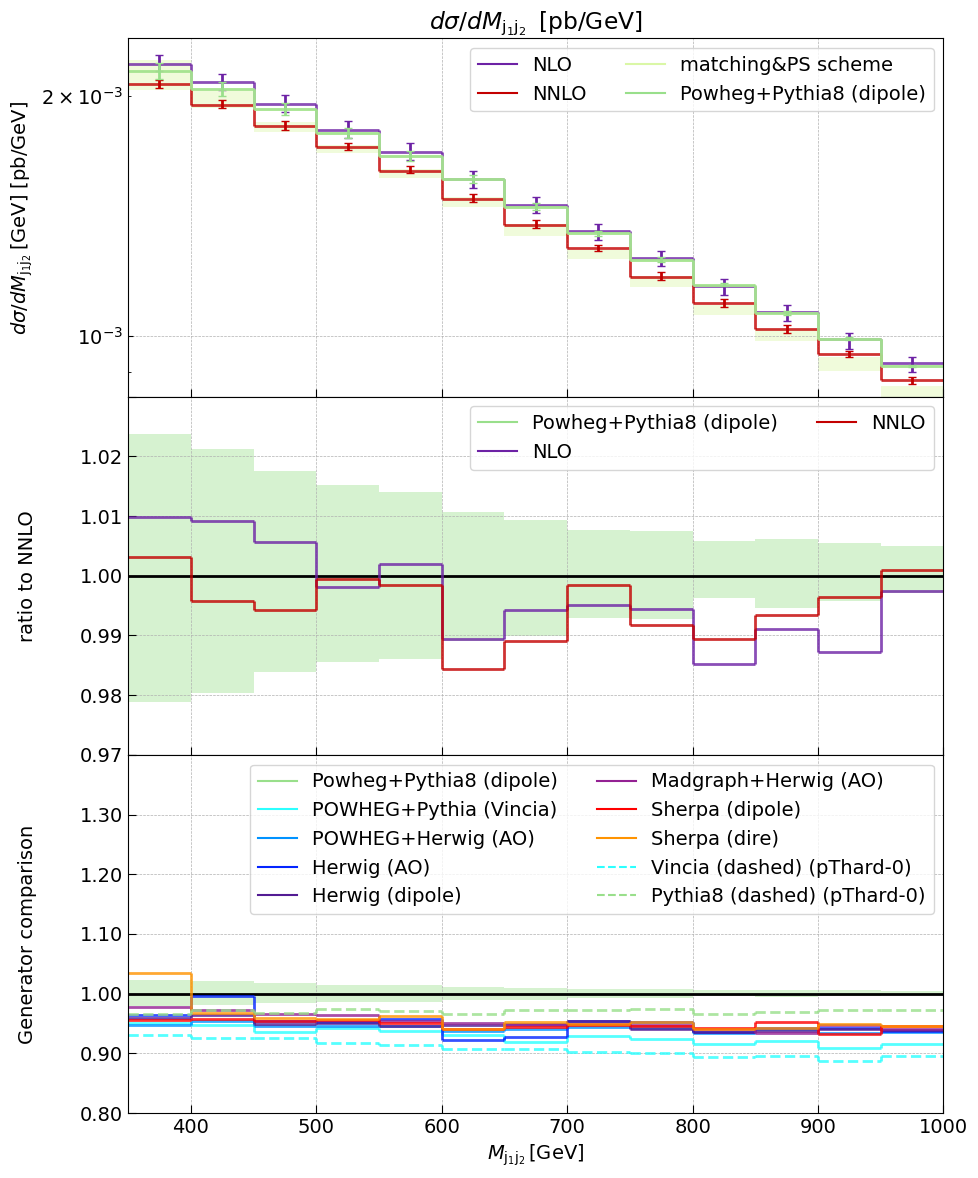

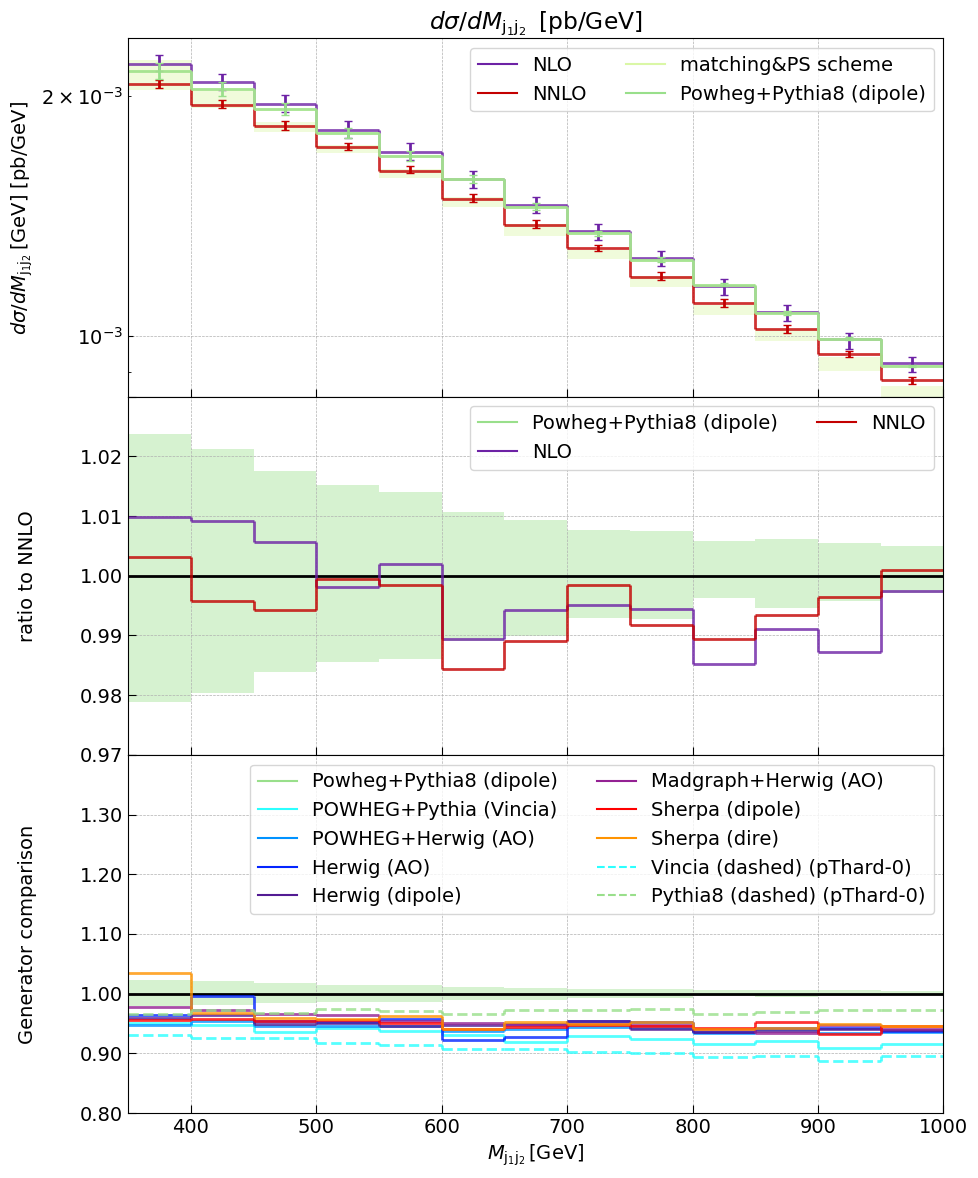

In [47]:
plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list_2, label_mapping_2, 350, 1000, 0, custom_color_map=color_mapping,settings={})
# For the second plot uncertaintiyes only for the baseline 

### NLOPS-2 STXS

In [48]:
key_to_plot = f"{key_to_plot_2}-STXS\n"

In [49]:
list(filter(lambda x: "stxs" in x, dir(yoda_reader_full)))

['bigstxs_central_scale_herwig_aoFULL',
 'bigstxs_central_scale_herwig_dipoleFULL',
 'bigstxs_central_scale_madH7FULL',
 'bigstxs_max_scale_herwig_aoFULL',
 'bigstxs_max_scale_herwig_dipoleFULL',
 'bigstxs_max_scale_madH7FULL',
 'bigstxs_min_scale_herwig_aoFULL',
 'bigstxs_min_scale_herwig_dipoleFULL',
 'bigstxs_min_scale_madH7FULL',
 'bigstxs_postprocessed_herwig_aoFULLFULL',
 'bigstxs_postprocessed_herwig_dipoleFULLFULL',
 'bigstxs_postprocessed_madH7FULLFULL',
 'histo_bigstxs_central_scale_herwig_aoFULL',
 'histo_bigstxs_central_scale_herwig_dipoleFULL',
 'histo_bigstxs_central_scale_madH7FULL',
 'histo_bigstxs_max_scale_herwig_aoFULL',
 'histo_bigstxs_max_scale_herwig_dipoleFULL',
 'histo_bigstxs_max_scale_madH7FULL',
 'histo_bigstxs_min_scale_herwig_aoFULL',
 'histo_bigstxs_min_scale_herwig_dipoleFULL',
 'histo_bigstxs_min_scale_madH7FULL',
 'histo_bigstxs_postprocessed_herwig_aoFULLFULL',
 'histo_bigstxs_postprocessed_herwig_dipoleFULLFULL',
 'histo_bigstxs_postprocessed_madH7FUL

In [52]:
pythia_full = yoda_reader_full.postprocessed_stxs_pythiaFULLFULL[key_to_plot]
vincia_full = yoda_reader_full.postprocessed_stxs_vinciaFULLFULL[key_to_plot]
powheg_full = yoda_reader_full.postprocessed_stxs_powhegFULLFULL[key_to_plot]
pythia_2_full = yoda_reader_full.postprocessed_stxs_pythia_pt_2FULLFULL[key_to_plot]
vincia_2_full = yoda_reader_full.postprocessed_stxs_vincia_pt_2FULLFULL[key_to_plot]


herwig_ao_full = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader_full.bigstxs_postprocessed_herwig_aoFULLFULL))[0]["data"]
herwig_dipole_full = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader_full.bigstxs_postprocessed_herwig_dipoleFULLFULL))[0]["data"]
madH7_full = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader_full.bigstxs_postprocessed_madH7FULLFULL))[0]["data"]
sherpa_dipole_full = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader_full.stxs_sherpa_dipoleFULL))[0]["data"]
sherpa_dire_full = list(filter(lambda x : x["index"] == key_to_plot,yoda_reader_full.stxs_sherpa_direFULL))[0]["data"]

In [53]:
data["data"]["pythia_full"] = pythia_full
data["data"]["vincia_full"] = vincia_full
data["data"]["powheg_full"] = powheg_full
data["data"]["sherpa_dipole_full"] = sherpa_dipole_full
data["data"]["sherpa_dire_full"] = sherpa_dire_full
data["data"]["herwig_ao_full"] = herwig_ao_full
data["data"]["herwig_dipole_full"] = herwig_dipole_full
data["data"]["madH7_full"] = madH7_full
data["data"]["pythia_2_full"] = pythia_2_full
data["data"]["vincia_2_full"] = vincia_2_full

In [56]:
# Creating Full vs VBF
pythia_ratio = red.delta_mocanlo(pythia_full, data["data"]["pythia"])
vincia_ratio = red.delta_mocanlo(vincia_full, data["data"]["vincia"])
madH7_ratio = red.delta_mocanlo(madH7_full, data["data"]["madH7"])
sherpa_dipole_ratio = red.delta_mocanlo(sherpa_dipole_full, data["data"]["sherpa_dipole"])

pythia_2_ratio = red.delta_mocanlo(pythia_2_full, data["data"]["pythia_2"])
vincia_2_ratio = red.delta_mocanlo(vincia_2_full, data["data"]["vincia_2"])

data["data"]["pythia_ratio"] = pythia_ratio
data["data"]["madH7_ratio"] = madH7_ratio
data["data"]["sherpa_dipole_ratio"] = sherpa_dipole_ratio
data["data"]["vincia_ratio"] = vincia_ratio
data["data"]["pythia_2_ratio"] = pythia_2_ratio
data["data"]["vincia_2_ratio"] = vincia_2_ratio


In [59]:
# reference_list is just a settings json for plotting
# label_mapping is a dict to rename data["data"].keys() in the plot
reference_list_3 = [ {"data_ind": ["pythia", "madH7", "sherpa_dipole", "pythia_full", "madH7_full", "sherpa_dipole_full"],
                      "list_of_errors": ["pythia", "madH7", "sherpa_dipole", "pythia_full", "madH7_full", "sherpa_dipole_full"],
                    "error_bands": True,
                    
                    },
                    {"data_ind": ["pythia_ratio", "madH7_ratio" , "sherpa_dipole_ratio"],
                     #"list_of_errors": ["pythia_ratio", "madH7_ratio", "sherpa_dipole_ratio"],
                      "error_bands": False,
                      "horizontal_line": True,
                      "label": "ratio to VBF",
                    }
                ]

label_mapping_3 = {
    "pythia": "Powheg+Pythia8 (dipole) VBF",
    "madH7": "Madgraph+Herwig (AO) VBF",
    "sherpa_dipole": "Sherpa (dipole) VBF",
    
    "pythia_full": "Powheg+Pythia8 (dipole) Full",
    "madH7_full": "Madgraph+Herwig (AO) Full",
    "sherpa_dipole_full": "Sherpa (dipole) Full",

    "pythia_ratio": "Powheg+Pythia8 (dipole)",
    "madH7_ratio": "Madgraph+Herwig (AO)",
    "sherpa_dipole_ratio": "Sherpa (dipole)",
}

['#99DF8B', '#2CFFFF', '#0092FF', '#0425FF', 
          '#531B93', '#942193', '#FF0000', '#FF9300']

color_mapping = {
    "sum_pythia": "#99DF8B",
    "sum_NLO": "#6D22A5",
    "sum_NNLO": "#C30000",
    "sum_NLO_NNLO_pythia": "#C30000",
    "pythia": "#99DF8B",
    "bigstxs_postprocessed_proVBFH_NNLO" : "#C30000",
    "bigstxs_postprocessed_proVBFH_NLO": "#6D22A5",
    "vincia": "#2CFFFF",
    "powheg": "#0092FF",
    "sherpa_dipole": "#FF0000",
    "sherpa_dire": "#FF9300",
    "herwig_ao": "#0425FF",
    "herwig_dipole": "#531B93",
    "madH7": "#942193",
    "envelope_data": "#DAF7A6" #"B2E8A6"
}

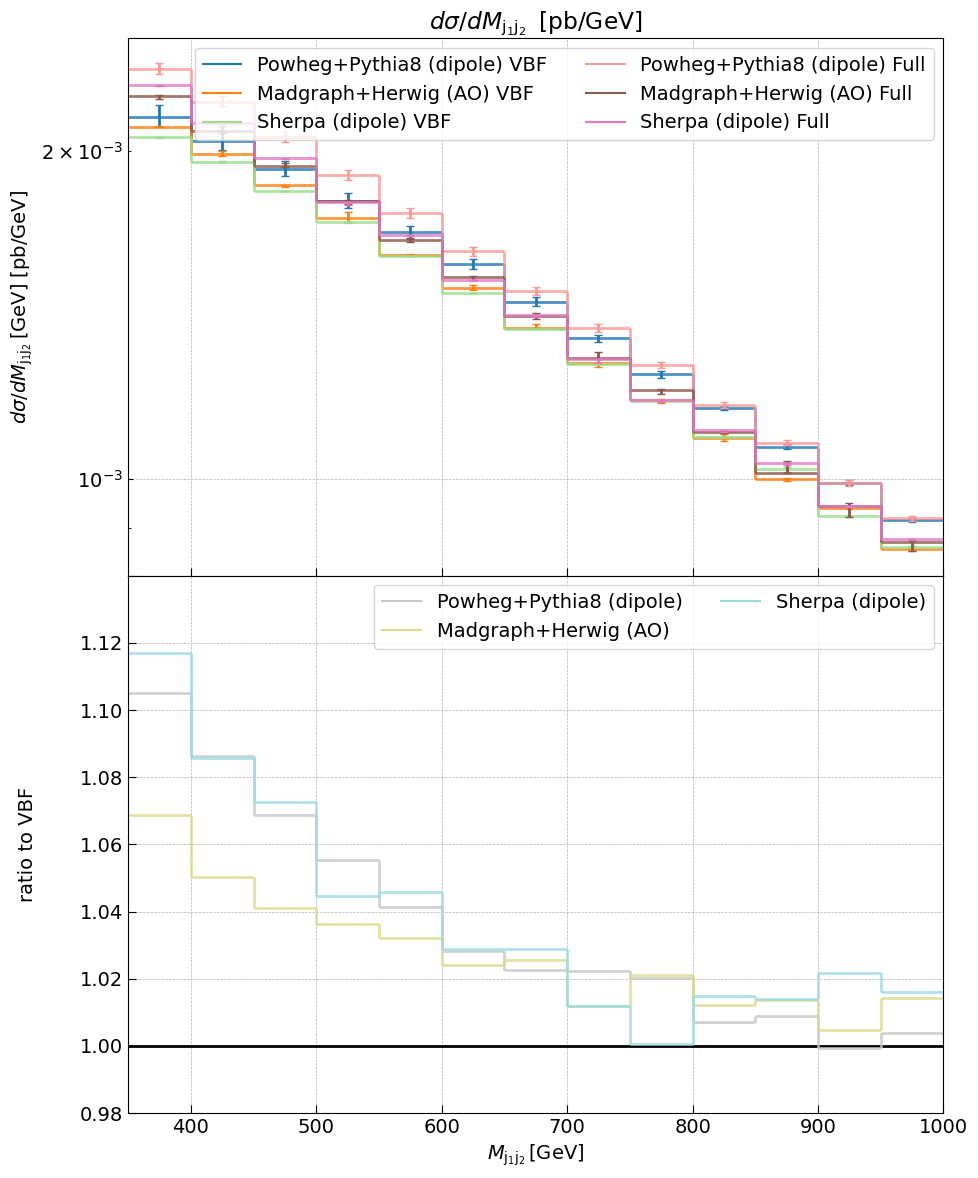

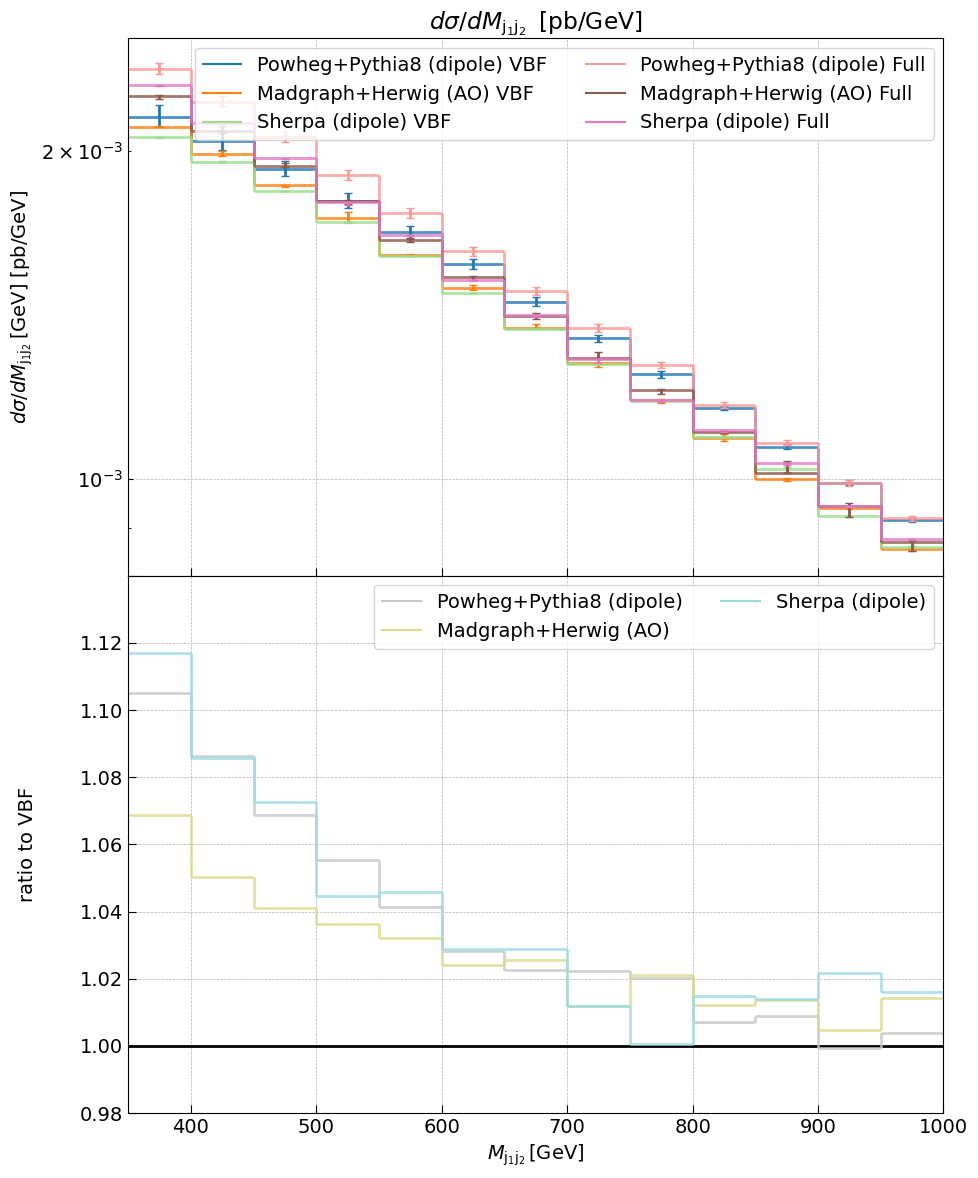

In [61]:
plotter.get_bigstxs_complex_histogram_histogramlike(data, reference_list_3, label_mapping_3, 350, 1000, 0, settings={})


### HISTO to Fiducial setup NLOPS1

In [10]:
yoda_obj_list = list(filter(lambda x: "postprocessed" in x and "histo" in x, dir(yoda_reader)))

In [11]:
yoda_obj_list

['histo_bigstxs_postprocessed_herwig_ao',
 'histo_bigstxs_postprocessed_herwig_dipole',
 'histo_bigstxs_postprocessed_madH7',
 'postprocessed_histo_powheg',
 'postprocessed_histo_pythia',
 'postprocessed_histo_pythia_pt_2',
 'postprocessed_histo_sherpa_dipole',
 'postprocessed_histo_sherpa_dire',
 'postprocessed_histo_vincia',
 'postprocessed_histo_vincia_pt_2']

In [12]:
yoda_obj_list = list(filter(lambda x: "postprocessed" in x and "histo" in x, dir(yoda_reader)))
yoda_obj_list += ["histo_bigstxs_central_scale_herwig_ao", "histo_bigstxs_central_scale_herwig_dipole", "histo_bigstxs_central_scale_madH7",
                  'histo_powheg',
 'histo_pythia',
 'histo_vincia',
 'histo_sherpa_dipole',
 'histo_pythia_pt_2',
 'histo_vincia_pt_2',
 ]

In [13]:
full_obj_list = yoda_obj_list + ["histo_postprocessed_proVBFH_LO", "histo_postprocessed_proVBFH_NLO", "histo_postprocessed_proVBFH_NNLO", "histo_central_scale_proVBFH_LO", "histo_central_scale_proVBFH_NLO", "histo_central_scale_proVBFH_NNLO"]

In [71]:
from plotters.histoplotter import HistoPlotter
yoda_plotter = HistoPlotter(reader, yoda_reader)
combined_histo_data = yoda_plotter.combine_histo_data(full_obj_list, "histo_postprocessed_proVBFH_LO")

In [72]:
def prepare_envelope(combined_histo_data_sample):
    # Preparing envelope
    envelope_list = [
        'postprocessed_histo_vincia',
        'postprocessed_histo_powheg',
        'postprocessed_histo_sherpa_dipole',
        'postprocessed_histo_sherpa_dire',
        'histo_bigstxs_postprocessed_herwig_ao',
        'histo_bigstxs_postprocessed_herwig_dipole',
        'histo_bigstxs_postprocessed_madH7',
        'postprocessed_histo_pythia_pt_2',
        'postprocessed_histo_vincia_pt_2'
    ]
    target_data = 'postprocessed_histo_pythia'


    envelope_data = []
    all_data = [combined_histo_data_sample["data"][index] for index in envelope_list]
    for i in range(len(combined_histo_data_sample["data"][target_data])):
        all_values = list(map(lambda x: x[i][2], all_data))
        min_value = min(all_values)
        max_value = max(all_values)
        central = combined_histo_data_sample["data"][target_data][i][2]
        envelope_data.append(
            (combined_histo_data_sample["data"][target_data][i][0], combined_histo_data_sample["data"][target_data][i][1],
            central, central - min_value, max_value - central)
        )
    combined_histo_data_sample["data"]["envelope_data"] = envelope_data

In [81]:
# reference_list is just a settings json for plotting
# label_mapping is a dict to rename data["data"].keys() in the plot
'''
                    {"data_ind": ["sum_NLO" , "sum_NNLO", "postprocessed_histo_pythia", "sum_NLO_stat", "sum_NNLO_stat", "sum_envelope"],
                     "list_of_errors": ["sum_NLO_stat" , "sum_NNLO_stat"],
                      "error_bands": True,
                      "horizontal_line": True,
                      "horizontal_line_color": "#99DF8B",
                      "reference_ind": "postprocessed_histo_pythia",
                      "hashbands": ["sum_envelope"],
                      "label": "Ratio to NLOPS",
                    },
                    '''


reference_list_2 = [ {"data_ind": ["histo_postprocessed_proVBFH_NLO", "histo_postprocessed_proVBFH_NNLO", "postprocessed_histo_pythia",
                                   "histo_pythia",
                                    'histo_central_scale_proVBFH_NLO',
                                    'histo_central_scale_proVBFH_NNLO', "envelope_data"],

                      "list_of_errors": [
                                        'histo_pythia',
                                        'histo_central_scale_proVBFH_NLO',
                                        'histo_central_scale_proVBFH_NNLO'],

                        "hashbands": ["envelope_data"],

                    "error_bands": True,
                    
                    },
                    {"data_ind": ["histo_postprocessed_proVBFH_NLO" , "histo_postprocessed_proVBFH_NNLO", "postprocessed_histo_pythia", "histo_central_scale_proVBFH_NLO", "histo_central_scale_proVBFH_NNLO", "envelope_data"],
                     "list_of_errors": ["histo_central_scale_proVBFH_NLO" , "histo_central_scale_proVBFH_NNLO"],
                      "error_bands": True,
                      "horizontal_line": True,
                      "horizontal_line_color": "#99DF8B",
                      "reference_ind": "postprocessed_histo_pythia",
                      "hashbands": ["envelope_data"],
                      "label": "Ratio to NLOPS",
                    },

                    {"data_ind": ["postprocessed_histo_pythia_1", "postprocessed_histo_vincia", "postprocessed_histo_powheg", "histo_bigstxs_postprocessed_herwig_ao", "histo_bigstxs_postprocessed_herwig_dipole", "histo_bigstxs_postprocessed_madH7", "postprocessed_histo_sherpa_dipole", "postprocessed_histo_sherpa_dire",
                                  "postprocessed_histo_pythia_pt_2", "postprocessed_histo_vincia_pt_2"],
                    # "list_of_errors": ["vincia", "powheg", "herwig_ao", "herwig_dipole", "madH7", "sherpa_dipole", "sherpa_dire"],
                    "dashed_lines": ["postprocessed_histo_pythia_pt_2", "postprocessed_histo_vincia_pt_2"],
                    "reference_ind": "postprocessed_histo_pythia_1",
                    "error_bands": False,
                    "horizontal_line": True,
                    "horizontal_line_color": "#99DF8B",
                    "plot_label_for_reference": True,
                    "label": "Ratio to Powheg+Pythia8 (dipole)",
                    #"y_scale": (0.95,1.1),
                    }
                ]

label_mapping_2 = {
    "sum_pythia": "NLOPS",
    "sum_NLO": "NLO",
    "sum_NNLO": "NNLO",
    "sum_NLO_NNLO_pythia": "Sum of all",
    "postprocessed_histo_pythia": "NLOPS",
    "histo_postprocessed_proVBFH_NNLO" : "NNLO",
    "histo_postprocessed_proVBFH_NLO": "NLO",
    "postprocessed_histo_vincia": "Powheg+Pythia (Vincia)",
    "postprocessed_histo_powheg": "Powheg+Herwig (AO)",
    "postprocessed_histo_sherpa_dipole": "Sherpa (dipole)",
    "postprocessed_histo_sherpa_dire": "Sherpa (dire)",
    "histo_bigstxs_postprocessed_herwig_ao": "Herwig (AO)",
    "histo_bigstxs_postprocessed_herwig_dipole": "Herwig (dipole)",
    "histo_bigstxs_postprocessed_madH7": "Madgraph+Herwig (AO)",
    "envelope_data": "matching&PS scheme",
    "histo_central_scale_proVBFH_NLO": "",
    "histo_central_scale_proVBFH_NNLO": "",
    "sum_NLO_stat": "",
    "sum_NNLO_stat": "",
    "postprocessed_histo_pythia_1": "Powheg+Pythia8 (dipole)",
    "histo_pythia": "",
    "sum_envelope": "matching&PS scheme",
    "postprocessed_histo_pythia_pt_2": "Pythia (pThard0)",
    "postprocessed_histo_vincia_pt_2": "Vincia (pThard0)",
}

['#99DF8B', '#2CFFFF', '#0092FF', '#0425FF', 
          '#531B93', '#942193', '#FF0000', '#FF9300']
#FF9300 #2CFFFF
color_mapping = {
    "sum_pythia": "#99DF8B",
    "sum_NLO": "#6D22A5",
    "sum_NNLO": "#C30000",
    "sum_NLO_NNLO_pythia": "#C30000",
    "postprocessed_histo_pythia": "#99DF8B", #"#008000",#"#99DF8B",
    "histo_postprocessed_proVBFH_NNLO" : "#C30000",
    "histo_postprocessed_proVBFH_NLO": "#6D22A5",
    "postprocessed_histo_vincia": "#2CFFFF",
    "postprocessed_histo_powheg": "#0092FF",
    "postprocessed_histo_sherpa_dipole": "#FF0000",
    "postprocessed_histo_sherpa_dire": "#FF9300",
    "histo_bigstxs_postprocessed_herwig_ao": "#0425FF",
    "histo_bigstxs_postprocessed_herwig_dipole": "#531B93",
    "histo_bigstxs_postprocessed_madH7": "#942193",
    "envelope_data": "#B2E8A6", # "#FFA500",
    "histo_central_scale_proVBFH_NLO": "#6D22A5",
    "histo_central_scale_proVBFH_NNLO": "#C30000",
    "sum_NLO_stat": "#6D22A5",
    "sum_NNLO_stat": "#C30000",
    "postprocessed_histo_pythia_1": "#99DF8B",
    "histo_pythia": "#99DF8B",
    "sum_envelope": "#B2E8A6",
    "postprocessed_histo_pythia_pt_2": "#99DF8B",
    "postprocessed_histo_vincia_pt_2": "#2CFFFF",
}

In [82]:
# For different naming
combined_histo_data[0]["data"]["postprocessed_histo_pythia_1"] = combined_histo_data[0]["data"]["postprocessed_histo_pythia"]

In [83]:
settings = {
    "title": r"pp $\longrightarrow$ H + 2j (VBF only)                                         $\sqrt{S} = 13 TeV$",
}

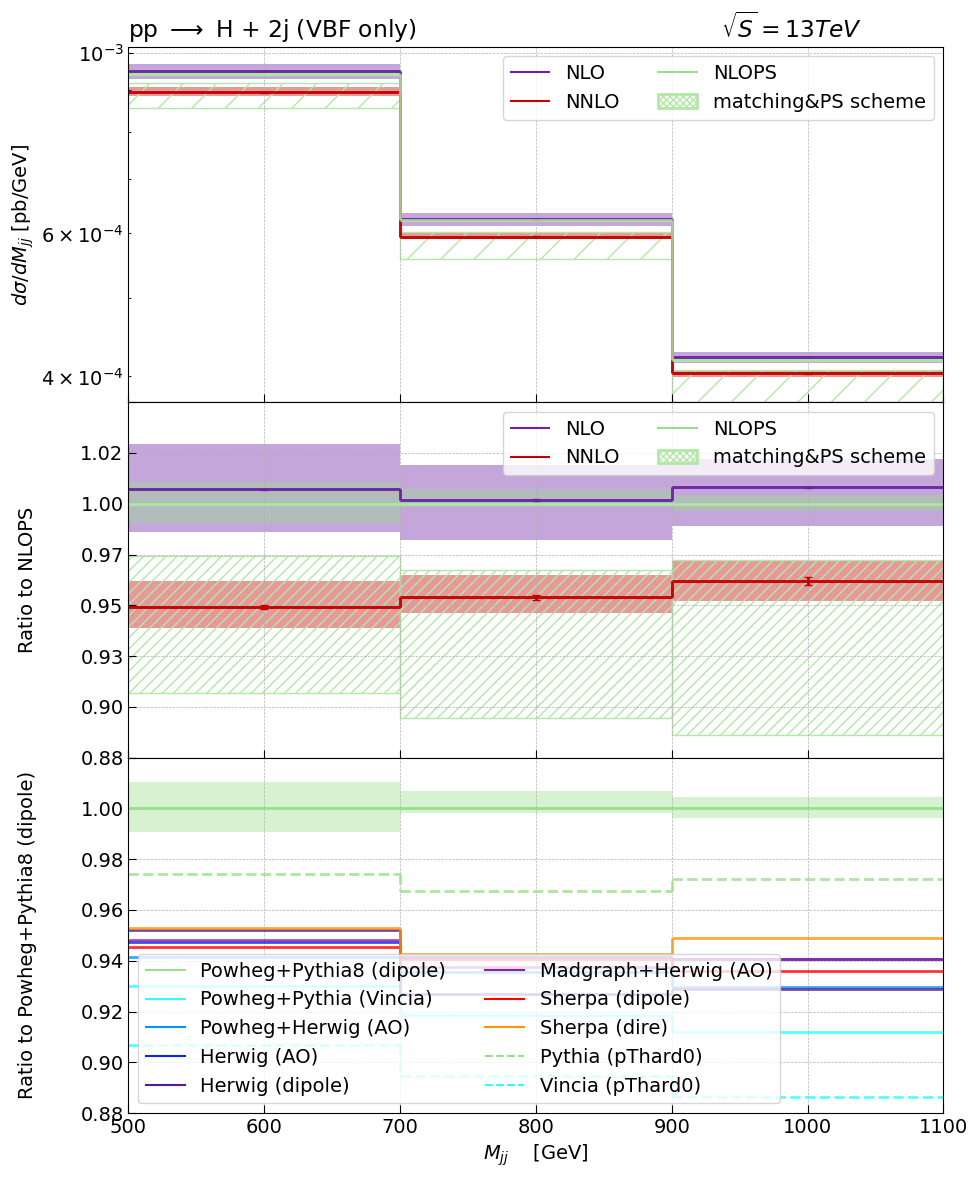

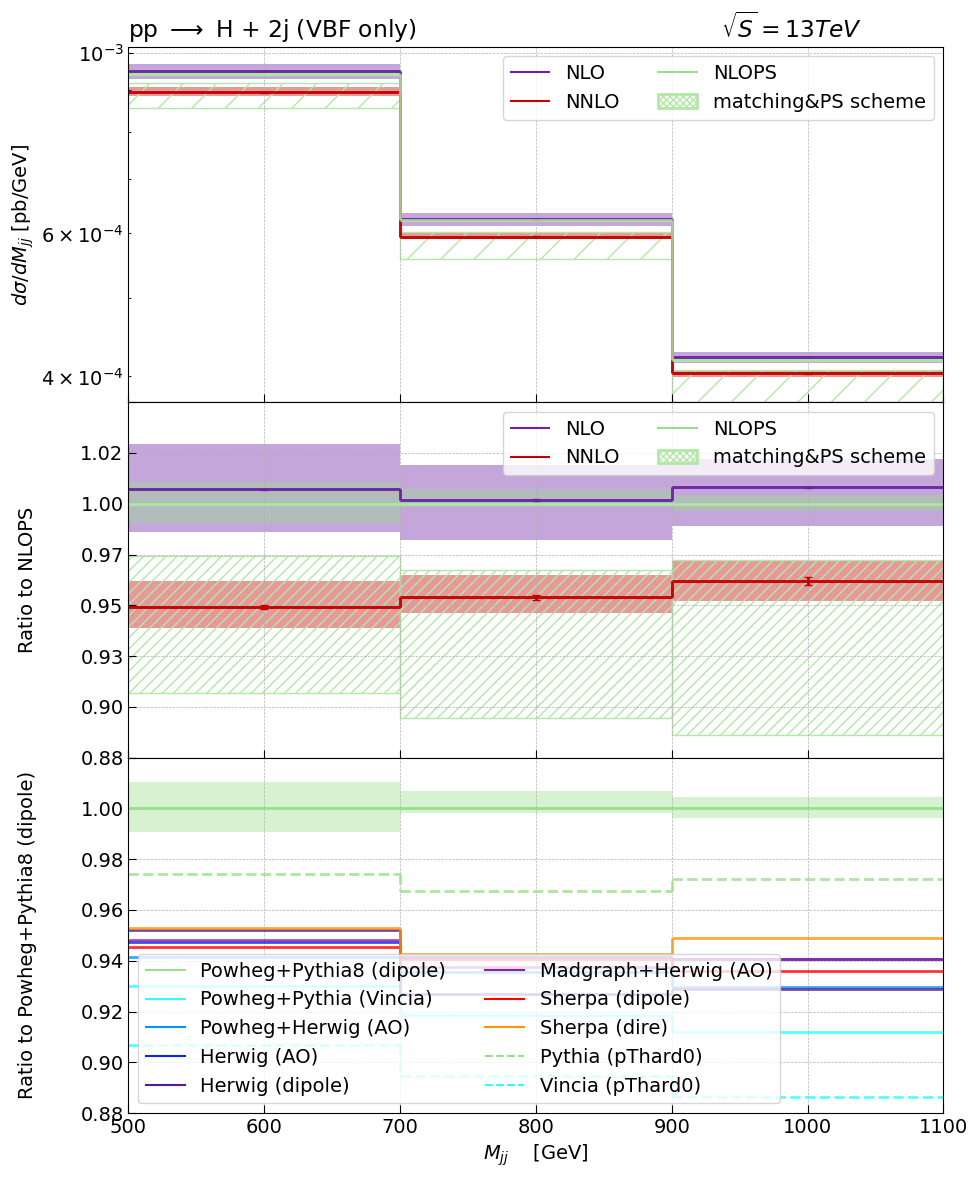

In [84]:
prepare_envelope(combined_histo_data[0])
settings = {
    "title": r"pp $\longrightarrow$ H + 2j (VBF only)                                         $\sqrt{S} = 13 TeV$",
}
plotter.get_bigstxs_complex_histogram_histogramlike(combined_histo_data[0], reference_list_2, label_mapping_2, 500, 1100, 0, custom_color_map=color_mapping, settings=settings)

### NLOPS-2 fiducial setup

In [106]:
yoda_obj_list_full = list(filter(lambda x: "postprocessed" in x and "histo" in x, dir(yoda_reader_full)))
yoda_obj_list_full += ["histo_bigstxs_central_scale_herwig_aoFULL",
                       "histo_bigstxs_central_scale_herwig_dipoleFULL",
                       "histo_bigstxs_central_scale_madH7FULL",
                  'histo_powhegFULL',
 'histo_pythiaFULL',
 'histo_vinciaFULL',
 "histo_sherpa_dipoleFULL"]


In [107]:
yoda_obj_list = list(filter(lambda x: "postprocessed" in x and "histo" in x, dir(yoda_reader)))
yoda_obj_list += ["histo_bigstxs_central_scale_herwig_ao",
                       "histo_bigstxs_central_scale_herwig_dipole",
                       "histo_bigstxs_central_scale_madH7",
                  'histo_powheg',
 'histo_pythia',
 'histo_vincia',
 "histo_sherpa_dipole"]

In [108]:
from plotters.histoplotter import HistoPlotter

In [109]:
full_obj_list = yoda_obj_list + yoda_obj_list_full
yoda_plotter = HistoPlotter(yoda_reader, yoda_reader_full)
combined_histo_data = yoda_plotter.combine_histo_data(full_obj_list, "histo_pythia")

In [110]:
for sample in combined_histo_data:
    try:
        sample["data"]["pythia_ratio_scale"] = red.delta_mocanlo(sample["data"]["postprocessed_histo_pythiaFULLFULL"],
                                                        sample["data"]["postprocessed_histo_pythia"])
        sample["data"]["pythia_ratio_stat"] = red.delta_mocanlo(sample["data"]["histo_pythiaFULL"],
                                                        sample["data"]["histo_pythia"])
        
        sample["data"]["madH7_ratio_scale"] = red.delta_mocanlo(sample["data"]["histo_bigstxs_postprocessed_madH7FULLFULL"],
                                                        sample["data"]["histo_bigstxs_postprocessed_madH7"])
        sample["data"]["madH7_ratio_stat"] = red.delta_mocanlo(sample["data"]["histo_bigstxs_central_scale_madH7FULL"],
                                                        sample["data"]["histo_bigstxs_central_scale_madH7"])
        
        sample["data"]["sherpa_ratio_scale"] = red.delta_mocanlo(sample["data"]["postprocessed_histo_sherpa_dipoleFULLFULL"],
                                                        sample["data"]["postprocessed_histo_sherpa_dipole"])
        sample["data"]["sherpa_ratio_stat"] = red.delta_mocanlo(sample["data"]["histo_sherpa_dipoleFULL"],
                                                        sample["data"]["histo_sherpa_dipole"])
        
        sample["data"]["herwig_ao_ratio_scale"] = red.delta_mocanlo(sample["data"]["histo_bigstxs_postprocessed_herwig_aoFULLFULL"],
                                                        sample["data"]["histo_bigstxs_postprocessed_herwig_ao"])
        sample["data"]["herwig_ao_ratio_stat"] = red.delta_mocanlo(sample["data"]["histo_bigstxs_central_scale_herwig_aoFULL"],
                                                        sample["data"]["histo_bigstxs_central_scale_herwig_ao"])

        print(sample["index"])
    except:
        pass



HISTO-MJJ-PTH-0-80-PTJ-20

HISTO-MJJ-PTH-0-80-PTJ-30

HISTO-MJJ-PTH-80-120-PTJ-20

HISTO-MJJ-PTH-80-120-PTJ-30

HISTO-MJJ-PTH-120-260-PTJ-20

HISTO-MJJ-PTH-120-260-PTJ-30

HISTO-MJJ-PTH-260-500-PTJ-20

HISTO-MJJ-PTH-260-500-PTJ-30

HISTO-MJJ-PTH-500-850-PTJ-20

HISTO-MJJ-PTH-500-850-PTJ-30

HISTO-MJJ-PTH-850-INFTY-PTJ-20

HISTO-MJJ-PTH-850-INFTY-PTJ-30

HISTO-MJJ-DPHIJJ-0-PIov4-PTJ-20

HISTO-MJJ-DPHIJJ-0-PIov4-PTJ-30

HISTO-MJJ-DPHIJJ-PIov4-PIov2-PTJ-20

HISTO-MJJ-DPHIJJ-PIov4-PIov2-PTJ-30

HISTO-MJJ-DPHIJJ-PIov2-3PIov4-PTJ-20

HISTO-MJJ-DPHIJJ-PIov2-3PIov4-PTJ-30

HISTO-MJJ-DPHIJJ-3PIov4-PI-PTJ-20

HISTO-MJJ-DPHIJJ-3PIov4-PI-PTJ-30

HISTO-MJJ-DYJJ-2-4-PTJ-20

HISTO-MJJ-DYJJ-2-4-PTJ-30

HISTO-MJJ-DYJJ-4-5-PTJ-20

HISTO-MJJ-DYJJ-4-5-PTJ-30

HISTO-MJJ-DYJJ-5-6-PTJ-20

HISTO-MJJ-DYJJ-5-6-PTJ-30

HISTO-MJJ-DYJJ-6-7-PTJ-20

HISTO-MJJ-DYJJ-6-7-PTJ-30

HISTO-MJJ-DYJJ-7-INFTY-PTJ-20

HISTO-MJJ-DYJJ-7-INFTY-PTJ-30

HISTO-PTH-DYJJ-2-4-PTJ-20

HISTO-PTH-DYJJ-2-4-PTJ-30

HISTO-PTH-DYJJ-4-5-PTJ-20


In [111]:
# reference_list is just a settings json for plotting

# label_mapping is a dict to rename data["data"].keys() in the plot
reference_list_3 = [ {"data_ind": ["postprocessed_histo_pythia", "histo_bigstxs_postprocessed_herwig_ao", "postprocessed_histo_sherpa_dipole", # Scales
                                   "histo_pythia", "histo_bigstxs_central_scale_herwig_ao", "histo_sherpa_dipole", # Stat
                                   "postprocessed_histo_pythiaFULLFULL", "histo_bigstxs_postprocessed_herwig_aoFULLFULL", "postprocessed_histo_sherpa_dipoleFULLFULL", # Scales
                                   "histo_pythiaFULL", "histo_bigstxs_central_scale_herwig_aoFULL", "histo_sherpa_dipoleFULL", # Stat
                                   ],
                      "list_of_errors": ["histo_pythia", "histo_bigstxs_central_scale_madH7", "histo_pythiaFULL", "histo_bigstxs_central_scale_herwig_aoFULL"],
                    "error_bands": True,
                      "dashed_lines": ["postprocessed_histo_pythiaFULLFULL", "histo_bigstxs_postprocessed_herwig_aoFULLFULL", "postprocessed_histo_sherpa_dipoleFULLFULL", # Scales
                                   "histo_pythiaFULL", "histo_bigstxs_central_scale_herwig_aoFULL", "histo_sherpa_dipoleFULL"],
                      "hashbands": ["postprocessed_histo_pythiaFULLFULL", "histo_bigstxs_postprocessed_herwig_aoFULLFULL", "postprocessed_histo_sherpa_dipoleFULLFULL"]
                    },
                    {"data_ind": ["pythia_ratio_scale", "herwig_ao_ratio_scale", "pythia_ratio_stat", "herwig_ao_ratio_stat" , "sherpa_ratio_stat", "sherpa_ratio_scale"],
                     "list_of_errors": ["pythia_ratio_stat", "herwig_ao_ratio_stat", "sherpa_ratio_stat"],
                      "error_bands": True,
                      "horizontal_line": True,
                      "label": "ratio to VBF",
                    }
                ]

label_mapping_3 = {
    "postprocessed_histo_pythia": "Powheg+Pythia8 (dipole) VBF",
    "histo_bigstxs_postprocessed_herwig_ao": "Herwig (AO) VBF",
    "postprocessed_histo_sherpa_dipole": "Sherpa (dipole) VBF",
    "histo_pythia": "",
    "histo_bigstxs_central_scale_herwig_ao": "",
    "histo_sherpa_dipole": "",

    
    "postprocessed_histo_pythiaFULLFULL": "Powheg+Pythia8 (dipole) Full",
    "histo_bigstxs_postprocessed_herwig_aoFULLFULL": "Herwig (AO) Full",
    "postprocessed_histo_sherpa_dipoleFULLFULL": "Sherpa (dipole) Full",
    "histo_pythiaFULL": "",
    "histo_bigstxs_central_scale_herwig_aoFULL": "",
    "histo_sherpa_dipoleFULL": "",
    

    "pythia_ratio_scale": "Powheg+Pythia8 (dipole)",
    "herwig_ao_ratio_scale": "Herwig (AO)",
    "sherpa_ratio_scale": "Sherpa (dipole)",
    "pythia_ratio_stat": "",
    "herwig_ao_ratio_stat": "",
    "sherpa_ratio_stat": ""
}

['#99DF8B', '#2CFFFF', '#0092FF', '#0425FF', 
          '#531B93', '#942193', '#FF0000', '#FF9300']
#FF9300 #2CFFFF

color_mapping = {
    'postprocessed_histo_pythia': '#228B22',
    'histo_bigstxs_postprocessed_herwig_ao': '#6D22A5',
    'postprocessed_histo_sherpa_dipole': '#FF9300',

    'histo_pythia': '#228B22',
    'histo_bigstxs_central_scale_herwig_ao': '#6D22A5',
    'histo_sherpa_dipole': '#FF9300',

    'postprocessed_histo_pythiaFULLFULL': '#4BAF9E',
    'histo_bigstxs_postprocessed_herwig_aoFULLFULL': '#0425FF',
    'postprocessed_histo_sherpa_dipoleFULLFULL': '#FF0000',

    'histo_pythiaFULL': '#4BAF9E',
    'histo_bigstxs_central_scale_herwig_aoFULL': '#0425FF',
    'histo_sherpa_dipoleFULL': '#FF0000',

    'pythia_ratio_scale': '#228B22',
    'herwig_ao_ratio_scale': '#6D22A5',
    'sherpa_ratio_scale': '#FF9300',

    'pythia_ratio_stat': '#228B22',
    'herwig_ao_ratio_stat': '#6D22A5',
    'sherpa_ratio_stat': '#FF9300'
 }


In [112]:
combined_histo_data[36]["index"]

'HISTO-MJJ-PTH-80-120-PTJ-20\n'

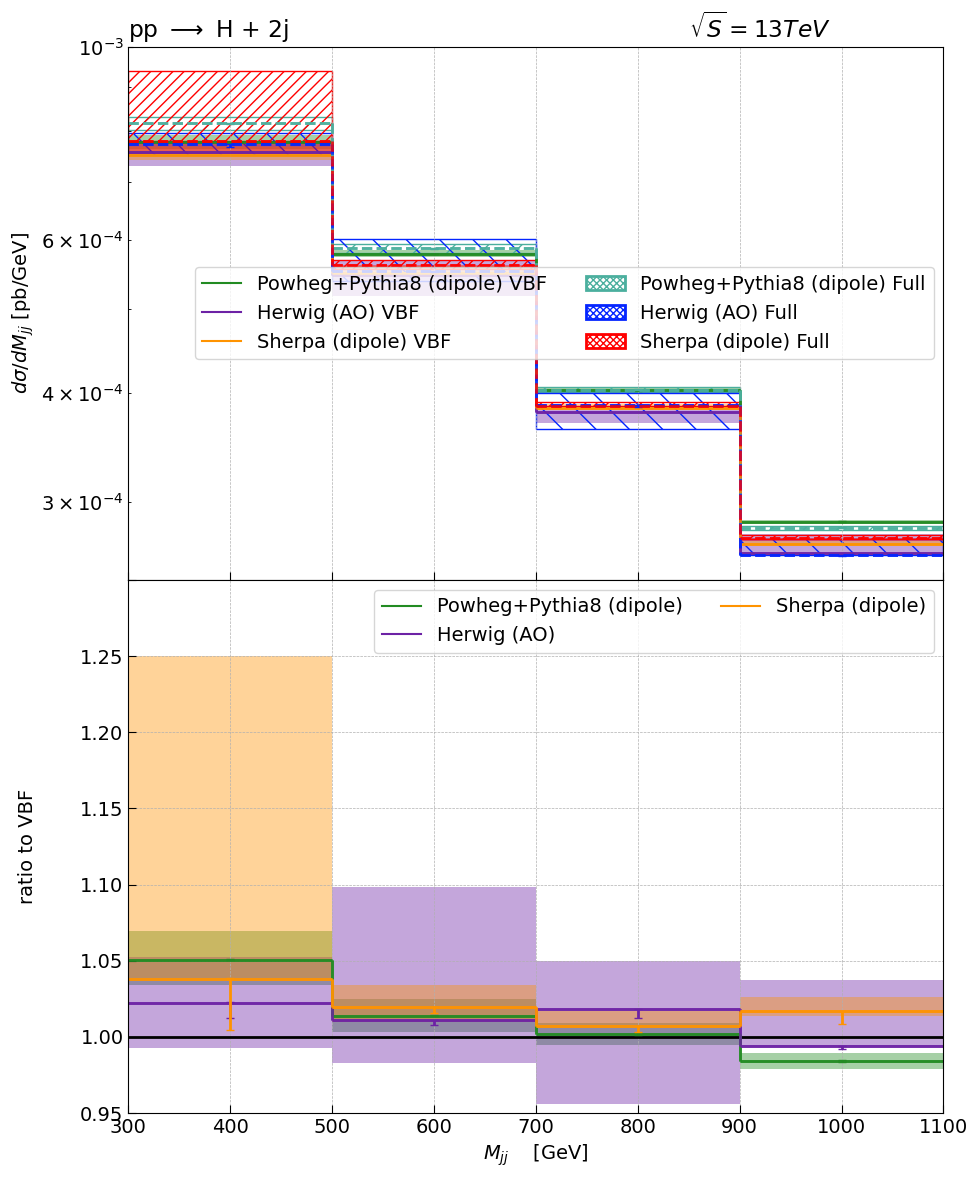

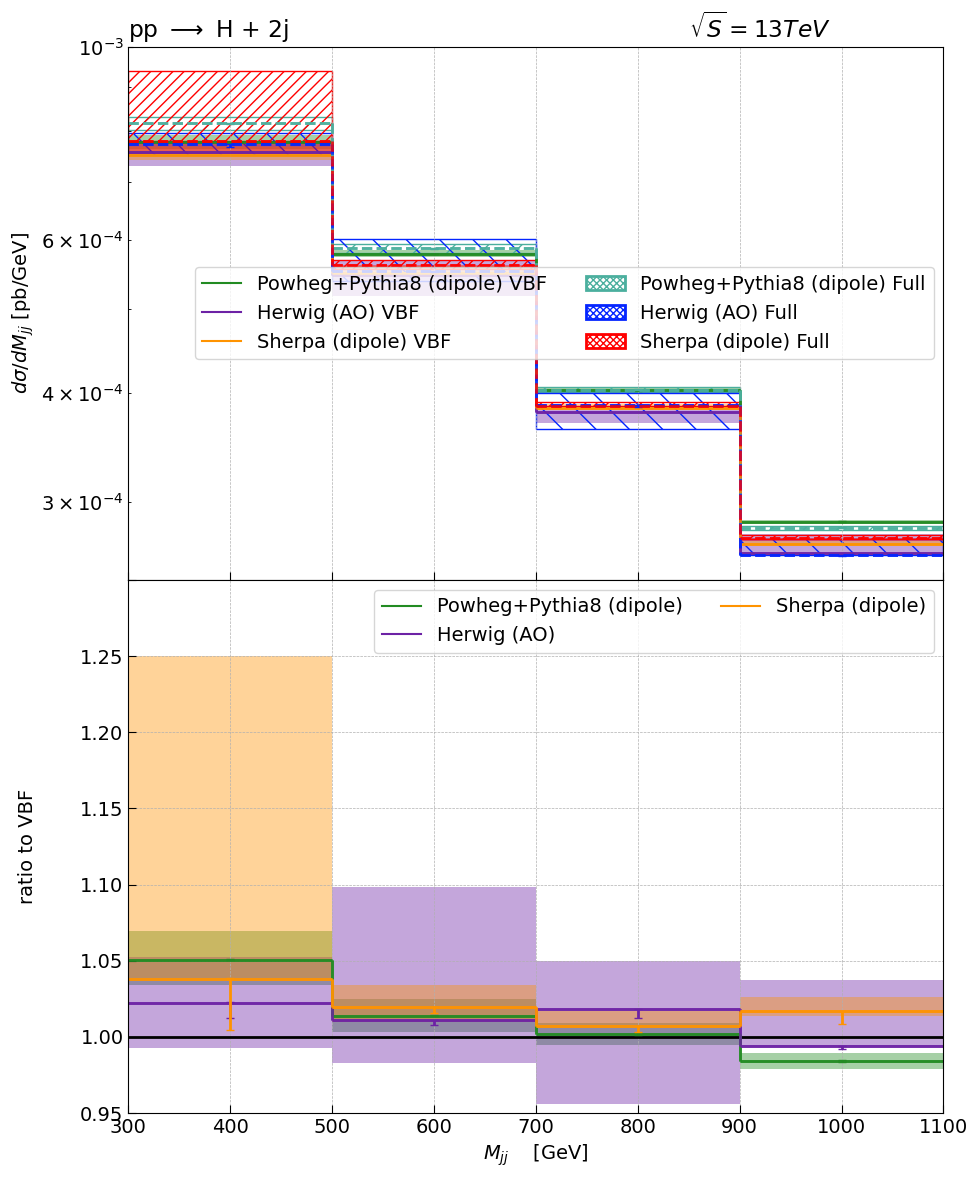

In [113]:
settings = {
    "title": r"pp $\longrightarrow$ H + 2j                                                      $\sqrt{S} = 13 TeV$",
}
plotter.get_bigstxs_complex_histogram_histogramlike(combined_histo_data[36], reference_list_3, label_mapping_3, 300, 1100, 0, custom_color_map=color_mapping, settings=settings)

In [114]:
color_mapping

{'postprocessed_histo_pythia': '#228B22',
 'histo_bigstxs_postprocessed_herwig_ao': '#6D22A5',
 'postprocessed_histo_sherpa_dipole': '#FF9300',
 'histo_pythia': '#228B22',
 'histo_bigstxs_central_scale_herwig_ao': '#6D22A5',
 'histo_sherpa_dipole': '#FF9300',
 'postprocessed_histo_pythiaFULLFULL': '#4BAF9E',
 'histo_bigstxs_postprocessed_herwig_aoFULLFULL': '#0425FF',
 'postprocessed_histo_sherpa_dipoleFULLFULL': '#FF0000',
 'histo_pythiaFULL': '#4BAF9E',
 'histo_bigstxs_central_scale_herwig_aoFULL': '#0425FF',
 'histo_sherpa_dipoleFULL': '#FF0000',
 'pythia_ratio_scale': '#228B22',
 'herwig_ao_ratio_scale': '#6D22A5',
 'sherpa_ratio_scale': '#FF9300',
 'pythia_ratio_stat': '#228B22',
 'herwig_ao_ratio_stat': '#6D22A5',
 'sherpa_ratio_stat': '#FF9300'}

### Saving NLOPS-2 HISTO

In [ ]:
for sample in combined_histo_data:
    try:
        index = sample["index"].strip()
        if "HISTO" in index and ("PTH-DYJJ" in index or "PTH-NJETS" in index) and not "[" in index:
            fig = plotter.get_bigstxs_complex_histogram_histogramlike(sample, reference_list_3, label_mapping_3, 0, 800, 0, custom_color_map=color_mapping, settings=settings)
            plt.savefig(f"/Users/nikitadolganov/Work/particle/plot_work/vbf-higgs-new/plotter/nlops2/{index}.pdf")
        elif "HISTO" in index and not "[" in index:
            fig = plotter.get_bigstxs_complex_histogram_histogramlike(sample, reference_list_3, label_mapping_3, 300, 1100, 0, custom_color_map=color_mapping, settings=settings)
            plt.savefig(f"/Users/nikitadolganov/Work/particle/plot_work/vbf-higgs-new/plotter/nlops2/{index}.pdf")
    except:
        pass




### Saving NLOPS1 HISTO

In [ ]:
for i in combined_histo_data:
    # For different naming
    try:
        i["data"]["postprocessed_histo_pythia_1"] = i["data"]["postprocessed_histo_pythia"]
        prepare_envelope(i)

        if "HISTO-MJJ-DYJJ" in i["index"] or "HISTO-MJJ-NJETS" in i["index"]:
            fig = plotter.get_bigstxs_complex_histogram_histogramlike(i, reference_list_2, label_mapping_2, 300, 1100, 0, custom_color_map=color_mapping, settings=settings)
        elif "HISTO-PTH-DYJJ" in i["index"] or "HISTO-PTH-NJETS" in i["index"]:
            fig = plotter.get_bigstxs_complex_histogram_histogramlike(i, reference_list_2, label_mapping_2, 0, 800, 0, custom_color_map=color_mapping, settings=settings)
        else:
            fig = plotter.get_bigstxs_complex_histogram_histogramlike(i, reference_list_2, label_mapping_2, 300, 1100, 0, custom_color_map=color_mapping, settings=settings)
        index = i["index"]
        plt.savefig(f"/Users/nikitadolganov/Work/particle/plot_work/vbf-higgs-new/plotter/nlops/{index}.pdf")
    except: 
        pass